# Final Project
### Topic: Using Principal Component Analysis to Evaluate Strength of 5 Ice Core Proxies in Reconstructing Earth Surface Temperature Over the Past 800,000 Years
#### 5 proxies: Deuterium, CO2, CH4, Dust, Calcium

#### Anna Chen (yc4406)

# 0. Background of study

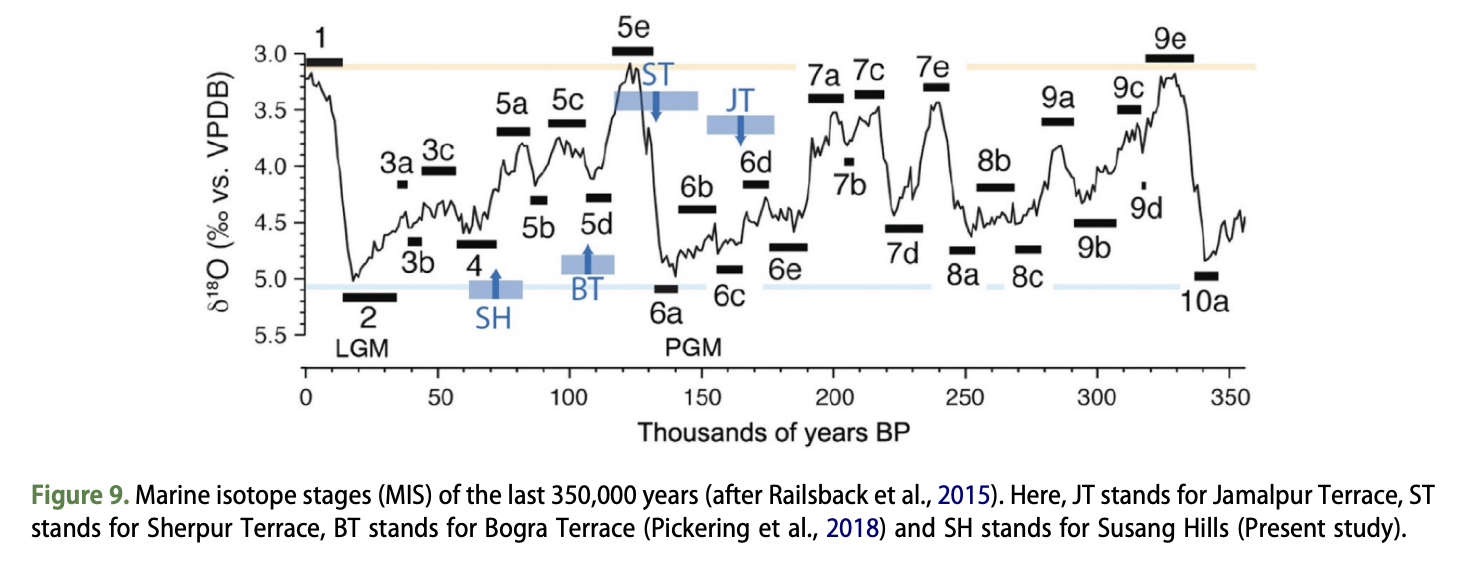

### Methodology visualized:

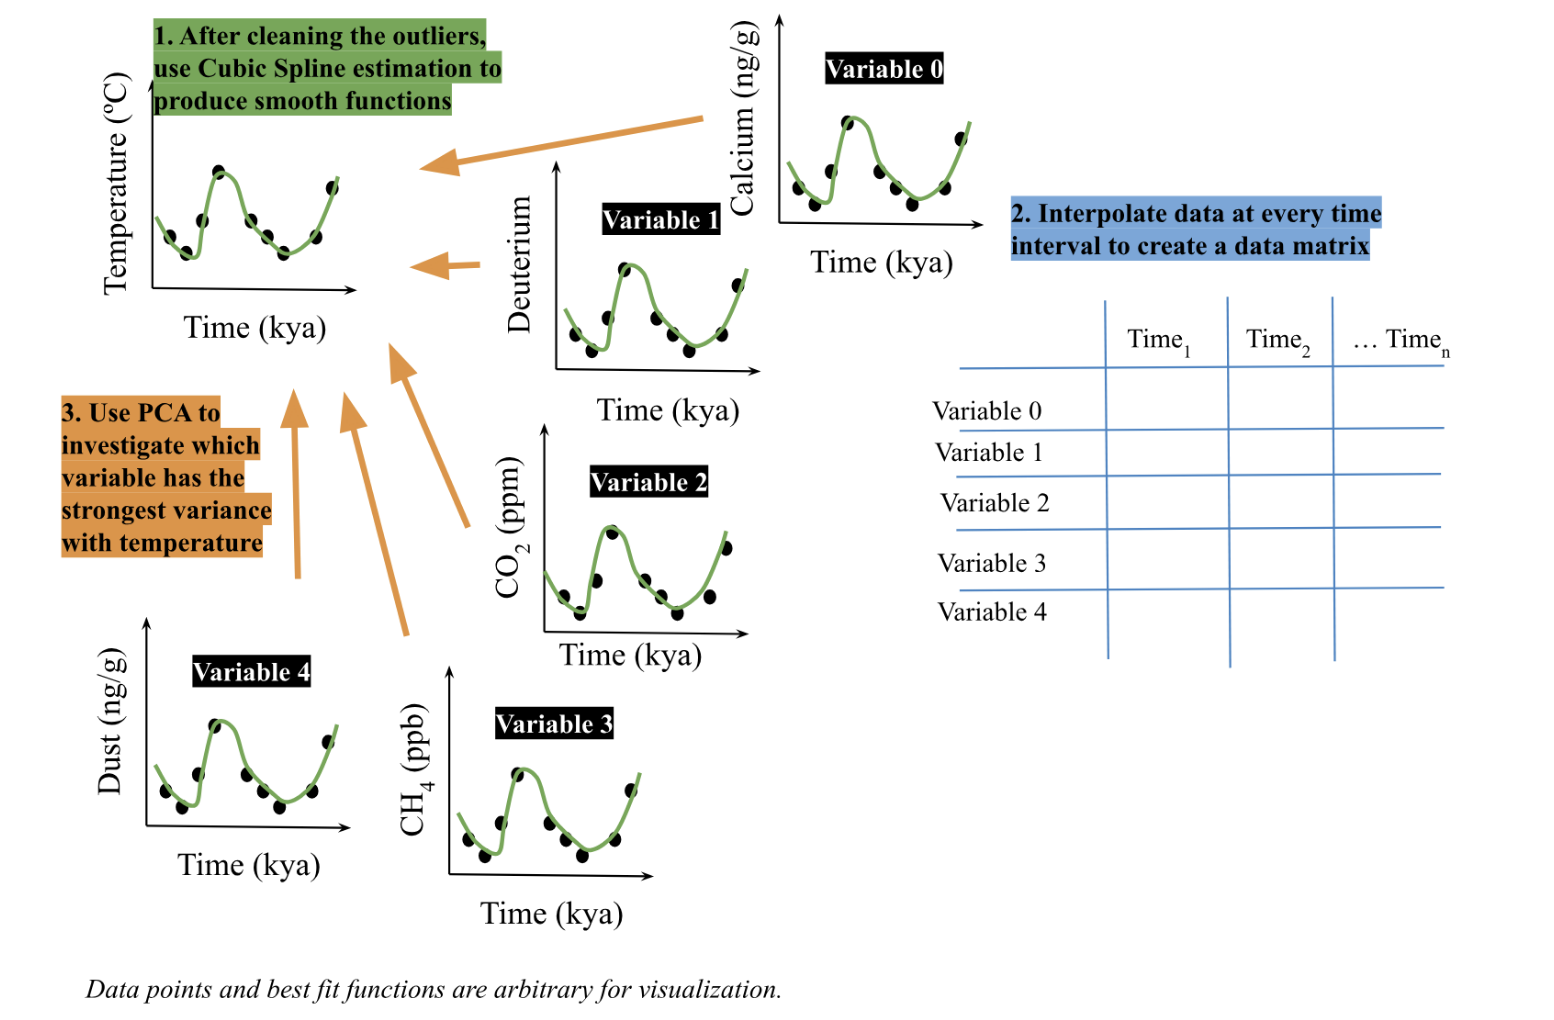

# 1. Load and plot proxies data

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.interpolate import CubicSpline
import math

## CO2
#### Original data in ppm

In [2]:
co2_csv = pd.read_csv('CO2.csv')
print(co2_csv)

      Gas_age(yr)  CO2(ppmv)
0             137      280.4
1             268      274.9
2             279      277.9
3             395      279.1
4             404      281.9
...           ...        ...
1090       794608      199.4
1091       795202      195.2
1092       796467      189.3
1093       797099      188.4
1094       798512      191.0

[1095 rows x 2 columns]


In [3]:
# make an array for co2 data
co2_no_nan = co2_csv.dropna()
co2_s = co2_no_nan.to_numpy()

In [4]:
co2_age = co2_s[:,0]/1000 # gas age in thousand of years
co2_dobs = co2_s[:,1] # observed data
cs_co2 = CubicSpline(co2_age,co2_dobs) # cubic spline

In [5]:
# Least Square Estimation
from scipy import optimize

P = 800     # Range of age in thousand of years (kya)

def leastsquare(age,A,B,C,D,E):
    """ Estimates data using Least Square method and Fourier Series
    
        takes in age and data values of the temperature proxy and returns parameters
    
    """
    dpre = A*np.cos(D*2*np.pi*co2_age/P) + B*np.sin(E*2*np.pi*co2_age/P) + C
    return dpre

mest = optimize.curve_fit(leastsquare, xdata = co2_age,
                             ydata = co2_dobs)[0]

A = mest[0]
B = mest[1]
C = mest[2]
D = mest[3]
E = mest[4]

dpre = A*np.cos(D*2*np.pi*co2_age/P) + B*np.sin(E*2*np.pi*co2_age/P) + C

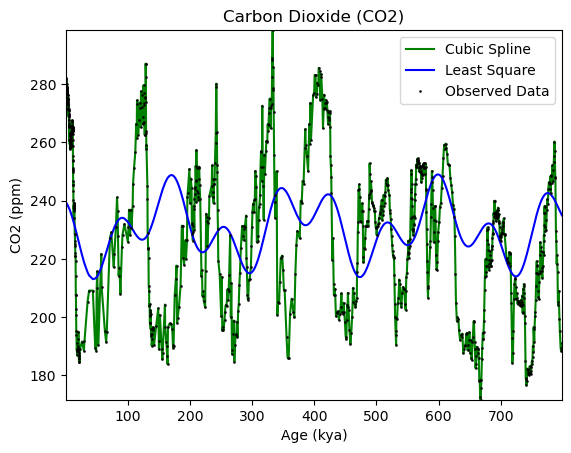

In [7]:
fig,ax = plt.subplots()
plt.axis([np.min(co2_age), np.max(co2_age), np.min(co2_dobs), np.max(co2_dobs)])
plt.plot(co2_age,cs_co2(co2_age),'g-', label = 'Cubic Spline')
plt.plot(co2_age,dpre,'b-', label = 'Least Square')
plt.plot(co2_age,co2_dobs,'ko', markersize=1, alpha=0.8, label = 'Observed Data')
plt.xlabel('Age (kya)')
plt.ylabel('CO2 (ppm)')
plt.title('Carbon Dioxide (CO2)')
plt.legend()

## CH4
#### Original data in ppb

In [8]:
ch4_csv = pd.read_csv('CH4.csv')
print(ch4_csv)

      EDC1999_depth(m)  Gas_age(yrs_bp_1950)  CH4_mean(ppbv)  \
0                99.34                    13             907   
1               102.45                   126             784   
2               102.58                   130             762   
3               103.34                   151             710   
4               104.33                   184             727   
...                ...                   ...             ...   
2098           3188.08                794938             428   
2099           3188.95                796320             418   
2100           3189.43                797277             396   
2101           3190.03                798417             458   
2102           3190.53                799396             399   

      1_s_uncertainty(ppbv) Site(Bern_Grenoble)  
0                      10.0                   b  
1                      10.0                   g  
2                      10.0                   b  
3                      10.0    

In [9]:
# make an array for ch4 data
ch4_no_nan = ch4_csv.dropna()
ch4_s = ch4_no_nan.to_numpy()

In [10]:
ch4_age = ch4_s[:,1]/1000 # gas age in k years
ch4_dobs = ch4_s[:,2] # data observed
cs_ch4 = CubicSpline(ch4_age,ch4_dobs) # cubic spline

In [12]:
fig,ax = plt.subplots()
plt.axis([np.min(ch4_age), np.max(ch4_age), np.min(ch4_dobs), np.max(ch4_dobs)])
plt.plot(ch4_age,cs_ch4(ch4_age),'g-', label = 'Cubic Spline')
plt.plot(ch4_age,ch4_dobs,'ko', markersize=1, alpha=0.8, label = 'Observed Data')
plt.xlabel('Age (kya)')
plt.ylabel('CH4 (ppb)')
plt.title('Methane (CH4)')
plt.legend()

## Deuterium
#### Original data in ‰SMOW (standard mean ocean water)

In [13]:
deuterium_csv = pd.read_csv('deuterium_temp.csv')
print(deuterium_csv)

      Depth(m)  Age(kaBP)  Deuterium(‰SMOW)  dTemp(ºC)
0         6.60      0.038            -390.9       0.88
1         7.15      0.047            -385.1       1.84
2         7.70      0.055            -377.8       3.04
3         8.25      0.064            -394.1       0.35
4         8.80      0.073            -398.7      -0.42
...        ...        ...               ...        ...
5783   3187.25    797.408            -440.2      -8.73
5784   3187.80    798.443            -439.0      -8.54
5785   3188.35    799.501            -441.1      -8.88
5786   3188.90    800.589            -441.4      -8.92
5787   3189.45    801.662            -440.9      -8.82

[5788 rows x 4 columns]


In [15]:
deuterium_no_nan = deuterium_csv.dropna()
deuterium_s = deuterium_no_nan.to_numpy()
print(deuterium_s)

[[ 6.60000e+00  3.80000e-02 -3.90900e+02  8.80000e-01]
 [ 7.15000e+00  4.70000e-02 -3.85100e+02  1.84000e+00]
 [ 7.70000e+00  5.50000e-02 -3.77800e+02  3.04000e+00]
 ...
 [ 3.18835e+03  7.99501e+02 -4.41100e+02 -8.88000e+00]
 [ 3.18890e+03  8.00589e+02 -4.41400e+02 -8.92000e+00]
 [ 3.18945e+03  8.01662e+02 -4.40900e+02 -8.82000e+00]]


In [16]:
deu_age = deuterium_s[:,1]
deu_dobs = deuterium_s[:,2]
cs_deuterium = CubicSpline(deu_age,deu_dobs)

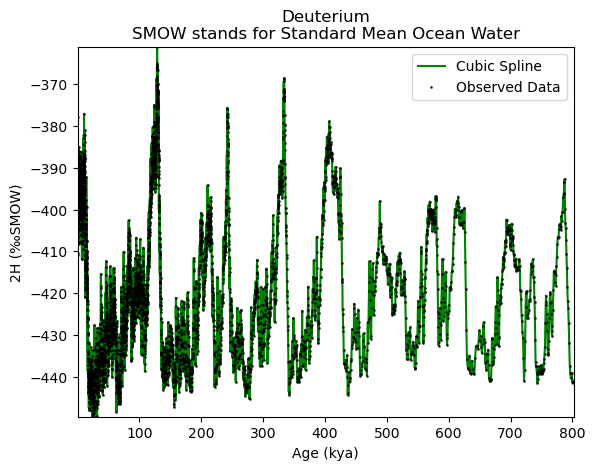

In [17]:
fig,ax = plt.subplots()
plt.axis([np.min(deu_age), np.max(deu_age), np.min(deu_dobs), np.max(deu_dobs)])
plt.plot(deu_age,cs_deuterium(deu_age),'g-', label = 'Cubic Spline')
plt.plot(deu_age,deu_dobs,'ko', markersize=1, alpha=0.7, label = 'Observed Data')
plt.xlabel('Age (kya)')
plt.ylabel('2H (‰SMOW)')
plt.title('Deuterium' + '\n' + 'SMOW stands for Standard Mean Ocean Water')
plt.legend()

## Oxygen
#### dO18-to-dO16 ratio, units are ‰

In [18]:
oxygen_csv = pd.read_csv('d18O.csv')
print(oxygen_csv)

      Depth ice/snow [m]  Gas age [ka BP]  δ18O-O2 [‰]
0                1410.77         101.7452      -0.0101
1                1413.52         102.0217      -0.1229
2                1416.27         102.2834       0.0024
3                1419.02         102.5235      -0.0148
4                1421.77         102.7362      -0.1060
...                  ...              ...          ...
1368             3186.81         797.5666       0.6495
1369             3187.93         799.3826       0.5870
1370             3188.87         801.0465       0.4870
1371             3190.53         804.4784       0.2045
1372             3191.14         805.8112       0.2732

[1373 rows x 3 columns]


In [19]:
oxygen_no_nan = oxygen_csv.dropna()
oxygen_s = oxygen_no_nan.to_numpy()

o2_age = oxygen_s[:,1]
o2_dobs = oxygen_s[:,2]
cs_o2 = CubicSpline(o2_age,o2_dobs)

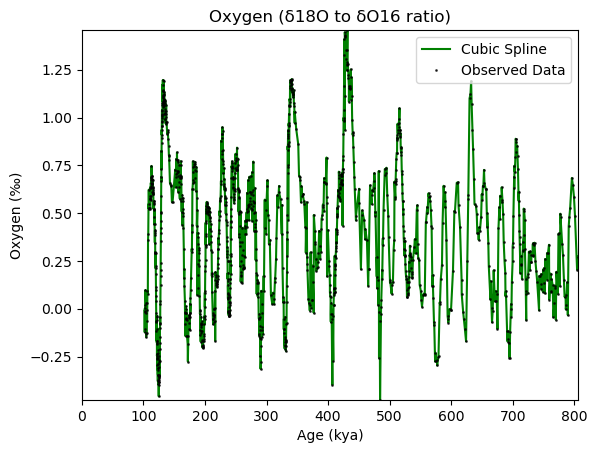

In [20]:
fig,ax = plt.subplots()
plt.axis([np.min(0), np.max(o2_age), np.min(o2_dobs), np.max(o2_dobs)])
plt.plot(o2_age,cs_o2(o2_age),'g-', label = 'Cubic Spline')
plt.plot(o2_age,o2_dobs,'ko', markersize=1, alpha=0.7, label = 'Observed Data')
plt.xlabel('Age (kya)')
plt.ylabel('Oxygen (‰)')
plt.title('Oxygen (δ18O to δO16 ratio)')
plt.legend()

## Dust (with outliers)
#### Original data in ng/g

In [21]:
dustmass_csv = pd.read_csv('dustmass.csv')
print(dustmass_csv)

      Depth(m)  EDC3Age(kyrBP)  LaserDust(ng/g)
0        24.20           0.371        22.500000
1        24.75           0.383        57.200000
2        25.30           0.395              NaN
3        25.85           0.407              NaN
4        26.40           0.419              NaN
...        ...             ...              ...
5750   3186.70         796.449       523.007771
5751   3187.25         797.408       634.727300
5752   3187.80         798.443       801.358320
5753   3188.35         799.501      1058.402000
5754   3188.90         800.589       663.793150

[5755 rows x 3 columns]


In [22]:
dustmass_no_nan = dustmass_csv.dropna()
dustmass_s = dustmass_no_nan.to_numpy()

dustmass_age = dustmass_s[:,1]
dustmass_dobs = dustmass_s[:,2]
cs_dustmass = CubicSpline(dustmass_age,dustmass_dobs)

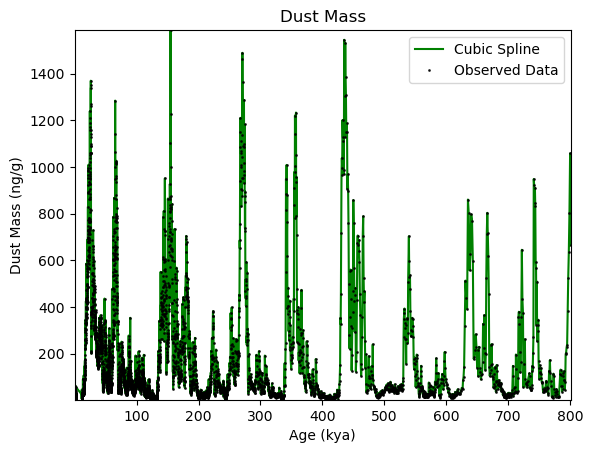

In [23]:
fig,ax = plt.subplots()
plt.axis([np.min(dustmass_age), np.max(dustmass_age), np.min(dustmass_dobs), np.max(dustmass_dobs)])
plt.plot(dustmass_age,cs_dustmass(dustmass_age),'g-', label = 'Cubic Spline')
plt.plot(dustmass_age,dustmass_dobs,'ko', markersize=1, alpha=0.8, label = 'Observed Data')
plt.xlabel('Age (kya)')
plt.ylabel('Dust Mass (ng/g)')
plt.title('Dust Mass')
plt.legend()

## Ca2+ (with outliers)
#### Original data in ng/g

In [24]:
ca_csv = pd.read_csv('Ca.csv')
print(ca_csv)

        Age [ka BP]  Depth ice/snow [m]  Ca2+ [ng/g]  nssCa2+ [µg/kg]
0          0.042976                6.90        3.303           2.7394
1          0.043130                6.91        3.944           3.1799
2          0.043283                6.92        4.060           3.0956
3          0.043437                6.93        4.060           2.8931
4          0.043590                6.94        4.668           3.2839
...             ...                 ...          ...              ...
297263   801.486418             3189.36       48.762          46.5609
297264   801.505927             3189.37       44.762          42.4004
297265   801.525436             3189.38       36.132          33.3789
297266   801.544945             3189.39       39.660          37.0253
297267   801.564455             3189.40       46.068          43.7405

[297268 rows x 4 columns]


In [25]:
ca_no_nan = ca_csv.dropna()
ca_s = ca_no_nan.to_numpy()

In [27]:
ca_age = ca_s[:,0]
ca_dobs = ca_s[:,2]
cs_ca = CubicSpline(ca_age,ca_dobs)

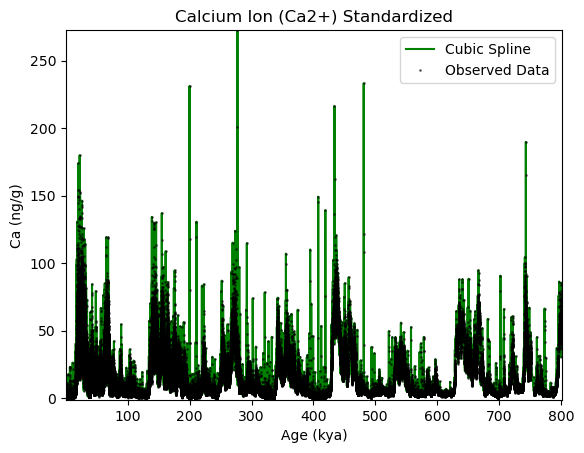

In [28]:
fig,ax = plt.subplots()
plt.axis([np.min(ca_age), np.max(ca_age), np.min(ca_dobs), np.max(ca_dobs)])
plt.plot(ca_age,cs_ca(ca_age),'g-', label = 'Cubic Spline')
plt.plot(ca_age,ca_dobs,'ko', markersize=1, alpha=0.5, label = 'Observed Data')
plt.xlabel('Age (kya)')
plt.ylabel('Ca (ng/g)')
plt.title('Calcium Ion (Ca2+) Standardized')
plt.legend()

# 2. Clean Outliers
#### (I had a friend from LA class who helped me with this)

In [28]:
# partition of glacial vs. interglacial
# Source:
# Lisiecki, L. E., & Raymo, M. E. (2005). A Pliocene-Pleistocene stack of 57
# globally distributed benthic δ18O records. Paleoceanography, 20(1), PA1003.
# https://doi.org/10.1029/2004PA001071

# | **MIS** | **Period (kya)**         | **Type**        |
# |---------|--------------------------|-----------------|
# | MIS 1   | 0 - 11.7                 | Interglacial    |
# | MIS 2   | 18 - 24                  | Glacial         |
# | MIS 3   | 24 - 57                  | Interglacial    |
# | MIS 4   | 57 - 71                  | Glacial         |
# | MIS 5   | 71 - 130                 | Interglacial    |
# | MIS 6   | 130 - 191                | Glacial         |
# | MIS 7   | 191 - 245                | Interglacial    |
# | MIS 8   | 245 - 300                | Glacial         |
# | MIS 9   | 300 - 335                | Interglacial    |
# | MIS 10  | 335 - 380                | Glacial         |
# | MIS 11  | 380 - 425                | Interglacial    |
# | MIS 12  | 425 - 480                | Glacial         |
# | MIS 13  | 480 - 533                | Interglacial    |
# | MIS 14  | 533 - 580                | Glacial         |
# | MIS 15  | 580 - 630                | Interglacial    |
# | MIS 16  | 630 - 670                | Glacial         |
# | MIS 17  | 670 - 700                | Interglacial    |
# | MIS 18  | 700 - 740                | Glacial         |
# | MIS 19  | 740 - 780                | Interglacial    |
# | MIS 20  | 780 - 800                | Glacial         |

In [30]:
#Methods

def remove_outliers_iqr(data, column,k):
    """Removes outliers based on IQR

        takes in data (np.ndarray),
        column (np.ndarray) to remove outliers from
        k (int) that specifies k*IQR threshold
        returns new data (np.ndarray) with outliers removed

    """
    q1 = np.percentile(column, 25)
    q3 = np.percentile(column, 75)
    iqr = q3 - q1

    lower_bound = q1 - k * iqr
    upper_bound = q3 + k * iqr

    # Mask the data to exclude outliers
    mask = (column >= lower_bound) & (column <= upper_bound)

    # Return only the rows where the column values are within bounds
    return data[mask]

def plot_graph(dobs,age,cs_data,ylabel,title):
    ''' Plots Cubic Spline graph

    takes in data columns (dobs, age, cs_data) and String title
    plots a Cubic Spline graph
    returns None

    '''

    fig,ax = plt.subplots()
    plt.axis([np.min(age), np.max(age), np.min(dobs), np.max(dobs)])
    plt.plot(age,cs_data(age),'g-', label = 'Cubic Spline')
    plt.plot(age,dobs,'ko', markersize=1, alpha=0.7, label = 'Observed Data')
    plt.xlabel('Age (kya)')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    return None

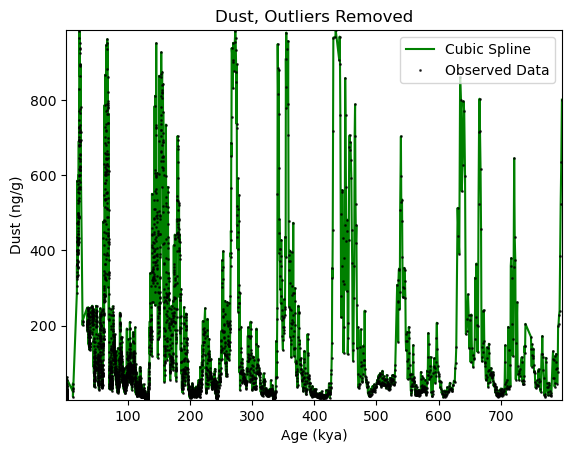

In [31]:
# Dust

# Define the intervals for interglacial and glacial periods (kya)
interglacial_periods = [
    (0, 11.7), (24, 57), (71, 130), (191, 245), (300, 335), (380, 425),
    (480, 533), (580, 630), (670, 700), (740, 780)  # MIS 1, 3, 5, 7, 9, 11, 13, 15, 17, 19
]

glacial_periods = [
    (18, 24), (57, 71), (130, 191), (245, 300), (335, 380), (425, 480),
    (533, 580), (630, 670), (700, 740), (780, 800)  # MIS 2, 4, 6, 8, 10, 12, 14, 16, 18, 20
]

# Splicing interglacial data
interglacial_data = []
for start, end in interglacial_periods:
    mask = (dustmass_age >= start) & (dustmass_age <= end)
    interglacial_data.append(dustmass_s[mask])

# Concatenate interglacial data
interglacial_s = np.vstack(interglacial_data)

# Splicing glacial data
glacial_data = []
for start, end in glacial_periods:
    mask = (dustmass_age >= start) & (dustmass_age <= end)
    glacial_data.append(dustmass_s[mask])

# Concatenate glacial data
glacial_s = np.vstack(glacial_data)

# Remove outliers for interglacial & glacial data
interglacial_s_no_outliers = remove_outliers_iqr(interglacial_s, interglacial_s[:, 2],1.5)  # Standardized column (ca_dobs)
glacial_s_no_outliers = remove_outliers_iqr(glacial_s, glacial_s[:, 2],1.5)  # Standardized column (ca_dobs)

# Concatenate new interglacial & glacial data
dustmass_s_no_outliers = np.vstack([interglacial_s_no_outliers, glacial_s_no_outliers])

# define columns
dustmass_combined_age = dustmass_s_no_outliers[:, 1]
dustmass_combined_dobs = dustmass_s_no_outliers[:, 2]

# sort data (or else plotting method won't process)
dustmass_sorted_indices = np.argsort(dustmass_combined_age)
dustmass_combined_age_sorted = dustmass_combined_age[dustmass_sorted_indices]
dustmass_combined_dobs_sorted = dustmass_combined_dobs[dustmass_sorted_indices]

# remove duplicates if necessary
unique_ages, indices = np.unique(dustmass_combined_age_sorted, return_index=True)
dustmass_combined_age_sorted = dustmass_combined_age_sorted[indices]
dustmass_combined_dobs_sorted = dustmass_combined_dobs_sorted[indices]

# create a new cubic spline for the sorted data
dustmass_cs_combined = CubicSpline(dustmass_combined_age_sorted, dustmass_combined_dobs_sorted)

# override old variable names with new variable names
dust_age = dustmass_combined_age_sorted
dust_dobs = dustmass_combined_dobs_sorted
cs_dust = dustmass_cs_combined

# Plot the data
plot_graph(dust_dobs, dust_age, cs_dust, 'Dust (ng/g)', 'Dust, Outliers Removed')

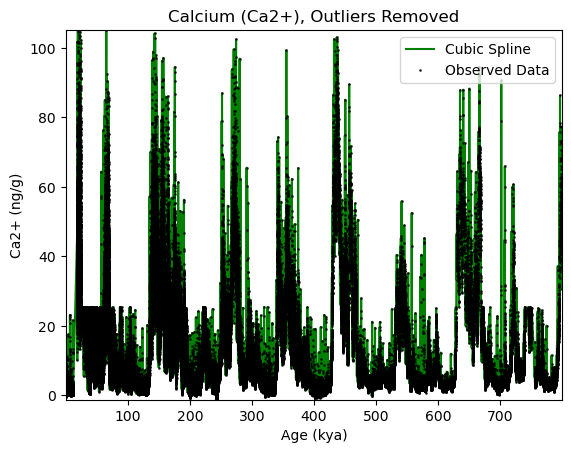

In [32]:
# Calcium: clean outliers

# Define intervals for interglacial & glacial periods (kya)
interglacial_periods = [
    (0, 11.7), (24, 57), (71, 130), (191, 245), (300, 335), (380, 425),
    (480, 533), (580, 630), (670, 700), (740, 780)  # MIS 1, 3, 5, 7, 9, 11, 13, 15, 17, 19
]

glacial_periods = [
    (18, 24), (57, 71), (130, 191), (245, 300), (335, 380), (425, 480),
    (533, 580), (630, 670), (700, 740), (780, 800)  # MIS 2, 4, 6, 8, 10, 12, 14, 16, 18, 20
]

# splice interglacial data
interglacial_data = []
for start, end in interglacial_periods:
    mask = (ca_age >= start) & (ca_age <= end)
    interglacial_data.append(ca_s[mask])

# Concatenate interglacial data
interglacial_s = np.vstack(interglacial_data)

# splice glacial data
glacial_data = []
for start, end in glacial_periods:
    mask = (ca_age >= start) & (ca_age <= end)
    glacial_data.append(ca_s[mask])

# Concatenate glacial data
glacial_s = np.vstack(glacial_data)

# Remove outliers for both
interglacial_s_no_outliers = remove_outliers_iqr(interglacial_s, interglacial_s[:, 2],3)  # Standardized column (ca_dobs)
glacial_s_no_outliers = remove_outliers_iqr(glacial_s, glacial_s[:, 2],3)  # Standardized column (ca_dobs)

# Concatenate interglacial and glacial data
ca_s_no_outliers = np.vstack([interglacial_s_no_outliers, glacial_s_no_outliers])

# name columns
ca_combined_age = ca_s_no_outliers[:, 0]
ca_combined_dobs = ca_s_no_outliers[:, 2]

# Sort data by (increasing) age
ca_sorted_indices = np.argsort(ca_combined_age)
ca_combined_age_sorted = ca_combined_age[ca_sorted_indices]
ca_combined_dobs_sorted = ca_combined_dobs[ca_sorted_indices]

# Create a new cubic spline for sorted data
ca_cs_combined = CubicSpline(ca_combined_age_sorted, ca_combined_dobs_sorted)

# override old variable names with new variable names
ca_age = ca_combined_age_sorted
ca_dobs = ca_combined_dobs_sorted
cs_cs = ca_cs_combined

# Plot
plot_graph(ca_dobs, ca_age, cs_cs, 'Ca2+ (ng/g)', 'Calcium (Ca2+), Outliers Removed')

## Plot combined graph with cleaned datasets

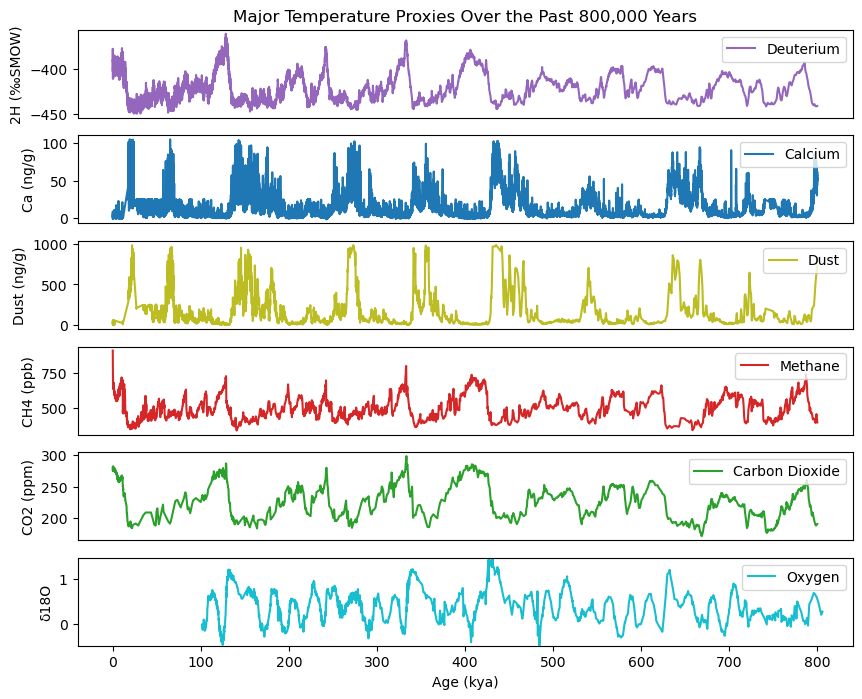

In [34]:
fig,ax = plt.subplots(nrows=6, ncols=1, figsize=(10,8))

ax[0].plot(deu_age,cs_deuterium(deu_age),'tab:purple', label = 'Deuterium')
ax[0].set_xticks([])
ax[0].set_ylabel('2H (‰SMOW)')

ax[1].plot(ca_combined_age_sorted, ca_cs_combined(ca_combined_age_sorted),'tab:blue', label = 'Calcium')
ax[1].set_xticks([])
ax[1].set_ylabel('Ca (ng/g)')

ax[2].plot(dustmass_combined_age_sorted, dustmass_cs_combined(dustmass_combined_age_sorted),'tab:olive', label = 'Dust')
ax[2].set_xticks([])
ax[2].set_ylabel('Dust (ng/g)')

ax[3].plot(ch4_age,cs_ch4(ch4_age),'tab:red', label = 'Methane')
ax[3].set_xticks([])
ax[3].set_ylabel('CH4 (ppb)')

ax[4].plot(co2_age,cs_co2(co2_age),'tab:green',  label = 'Carbon Dioxide')
ax[4].set_xticks([])
ax[4].set_ylabel('CO2 (ppm)')

ax[5].plot(o2_age,cs_o2(o2_age),'tab:cyan', label = 'Oxygen')
ax[5].axis([-40, 840,np.min(cs_o2(o2_age)),np.max(cs_o2(o2_age))])
ax[5].set_xlabel('Age (kya)')
ax[5].set_ylabel('δ18O')

ax[0].set_title('Major Temperature Proxies Over the Past 800,000 Years')

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
ax[4].legend()
ax[5].legend(loc = 'upper right')

# 3. Interpolation at set time intervals (with cleaned data)
#### Not including oxygen data because it doesn't start until 100kya

In [35]:
# time interval = 1 kya ("thousands of years ago")
time_1 = np.arange(1,801,1)

In [36]:
# estimate the data at each time stamp (when time interval = 1)
deu_1 = cs_deuterium(time_1)
dust_1 = dustmass_cs_combined(time_1)
ch4_1 = cs_ch4(time_1)
co2_1 = cs_co2(time_1)
ca_1 = ca_cs_combined(time_1)

In [37]:
# construct data matrix
data_1 = np.matrix([deu_1, co2_1, ch4_1, dust_1, ca_1])
NN = np.shape(data_1)
m = NN[0] # number of variables
n = NN[1] # number of time stamps, or enteries per variable/row

print("The original data matrix, X, is", data_1)
print("The number of variables/rows is", m)
print("When the time interval is 1 kya, the number of enteries per row is", n)
print("Matrix X has", m, "x", n, "enteries")

The original data matrix, X, is [[-3.98591314e+02 -4.02600192e+02 -3.95700000e+02 ... -4.39411750e+02
  -4.39905465e+02 -4.41583556e+02]
 [ 2.77604993e+02  2.76731822e+02  2.76601493e+02 ...  1.89526499e+02
   1.92697743e+02  1.96208716e+02]
 [ 6.30105650e+02  5.99001880e+02  5.80525959e+02 ...  4.34786961e+02
   4.51278847e+02  2.06654041e+02]
 [ 1.01682705e+01  2.24234236e+01  1.01720313e+03 ...  7.17630323e+02
   9.47270569e+02  1.37300256e+03]
 [ 1.35664054e+00  1.98824020e+00  1.08911556e+00 ...  4.85528336e+01
   6.74545265e+01  5.46449618e+01]]
The number of variables/rows is 5
When the time interval is 1 kya, the number of enteries per row is 800
Matrix X has 5 x 800 enteries


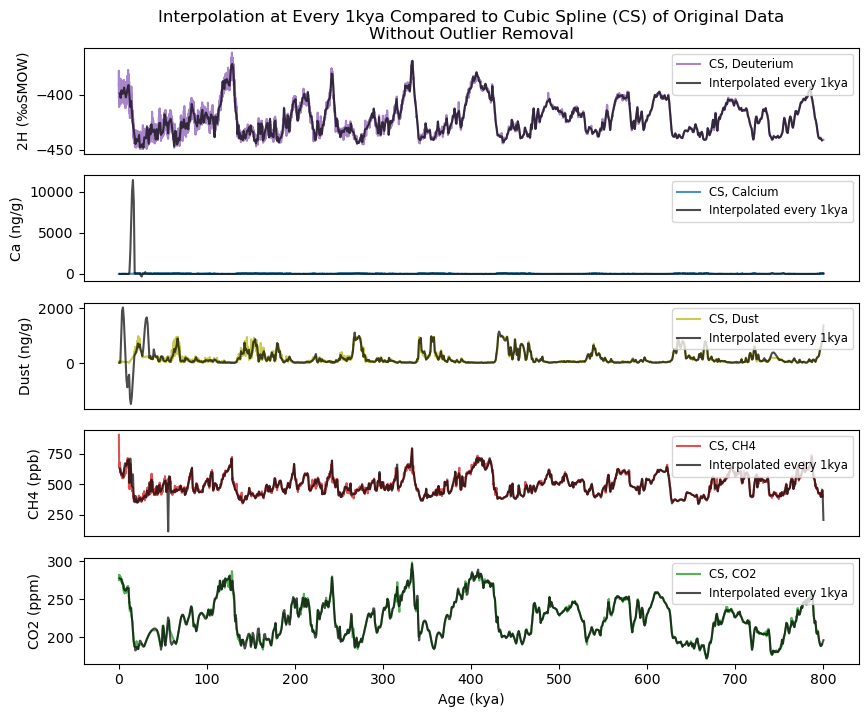

In [38]:
# plot each interpolation versus the original cubic spline
fig,ax = plt.subplots(nrows=5,ncols=1,figsize=(10,8))

ax[0].plot(deu_age, cs_deuterium(deu_age), 'tab:purple', alpha=0.8, label='CS, Deuterium')
ax[0].plot(time_1, deu_1, 'k-', alpha=0.7, label='Interpolated every 1kya')
ax[0].set_xticks([])
ax[0].set_title('Interpolation at Every 1kya Compared to Cubic Spline (CS) of Original Data' + '\n' + 'Without Outlier Removal')
ax[0].set_ylabel('2H (‰SMOW)')

ax[1].plot(ca_age, cs_ca(ca_age), 'tab:blue', alpha=0.8, label='CS, Calcium')
ax[1].plot(time_1, ca_1, 'k-', alpha=0.7, label='Interpolated every 1kya')
ax[1].set_xticks([])
ax[1].set_ylabel('Ca (ng/g)')

ax[2].plot(dust_age, cs_dust(dust_age), 'tab:olive', alpha=0.8, label='CS, Dust')
ax[2].plot(time_1, dust_1, 'k-', alpha=0.7, label='Interpolated every 1kya')
ax[2].set_xticks([])
ax[2].set_ylabel("Standard deviation from variable mean")
ax[2].set_ylabel('Dust (ng/g)')

ax[3].plot(ch4_age, cs_ch4(ch4_age), 'tab:red', alpha=0.8, label='CS, CH4')
ax[3].plot(time_1, ch4_1, 'k-', alpha=0.7, label='Interpolated every 1kya')
ax[3].set_xticks([])
ax[3].set_ylabel('CH4 (ppb)')

ax[4].plot(co2_age, cs_co2(co2_age), 'tab:green', alpha=0.8, label='CS, CO2')
ax[4].plot(time_1, co2_1, 'k-', alpha=0.7, label='Interpolated every 1kya')
ax[4].set_xlabel('Age (kya)')
ax[4].set_ylabel('CO2 (ppm)')

ax[0].legend(fontsize='small')
ax[1].legend(fontsize='small')
ax[2].legend(fontsize='small')
ax[3].legend(fontsize='small')
ax[4].legend(fontsize='small')

In [39]:
# because ca, dust, and ch4 doesn't interpolate properly, 
# we manually remove outliers and replace using 0

ca_1[ca_1 > 200] = np.mean(ca_1)
ca_1[ca_1 < -100] = np.mean(ca_1)
ca_1[:50][ca_1[:50] > 100] = np.mean(ca_1)
ca_1[700:770][ca_1[700:770] > 70] = np.mean(ca_1)
dust_1[dust_1 > 1500] = np.mean(dust_1)
dust_1[:50][dust_1[:50] > 800] = np.mean(dust_1)
dust_1[dust_1 < (-100)] = np.mean(dust_1)
ch4_1[ch4_1 < 250] = np.mean(ch4_1)

In [40]:
# re-construct data matrix and override original variable
data = np.matrix([deu_1, co2_1, ch4_1, dust_1, ca_1])

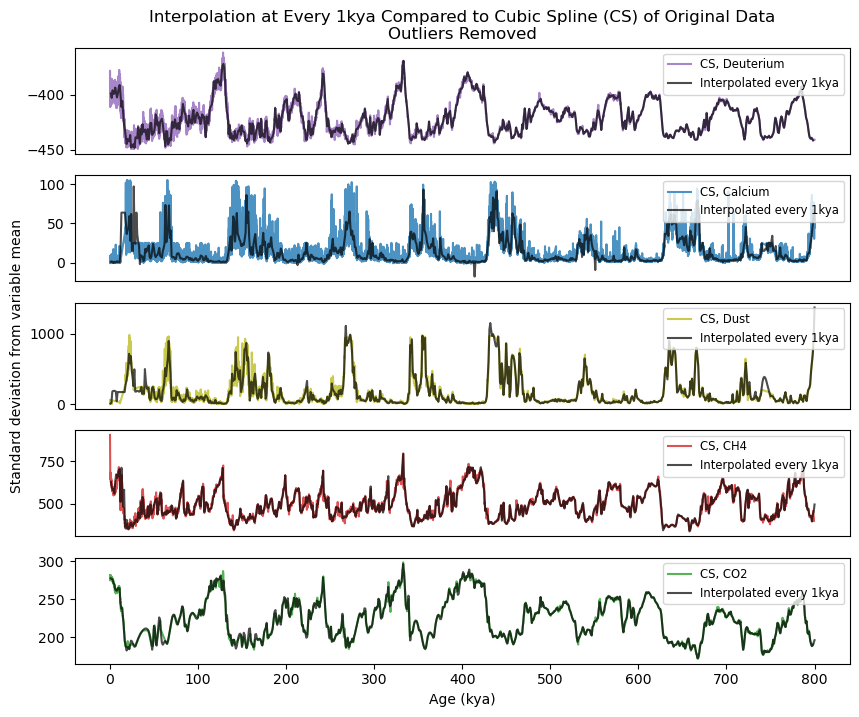

In [41]:
# re-plot each interpolation versus the original cubic spline
fig,ax = plt.subplots(nrows=5,ncols=1,figsize=(10,8))

ax[0].plot(deu_age, cs_deuterium(deu_age), 'tab:purple', alpha=0.8, label='CS, Deuterium')
ax[0].plot(time_1, deu_1, 'k-', alpha=0.7, label='Interpolated every 1kya')
ax[0].set_xticks([])
ax[0].set_title('Interpolation at Every 1kya Compared to Cubic Spline (CS) of Original Data' + '\n' + 'Outliers Removed')

ax[1].plot(ca_age, cs_ca(ca_age), 'tab:blue', alpha=0.8, label='CS, Calcium')
ax[1].plot(time_1, ca_1, 'k-', alpha=0.7, label='Interpolated every 1kya')
ax[1].set_xticks([])

ax[2].plot(dust_age, cs_dust(dust_age), 'tab:olive', alpha=0.8, label='CS, Dust')
ax[2].plot(time_1, dust_1, 'k-', alpha=0.7, label='Interpolated every 1kya')
ax[2].set_xticks([])
ax[2].set_ylabel("Standard deviation from variable mean")

ax[3].plot(ch4_age, cs_ch4(ch4_age), 'tab:red', alpha=0.8, label='CS, CH4')
ax[3].plot(time_1, ch4_1, 'k-', alpha=0.7, label='Interpolated every 1kya')
ax[3].set_xticks([])

ax[4].plot(co2_age, cs_co2(co2_age), 'tab:green', alpha=0.8, label='CS, CO2')
ax[4].plot(time_1, co2_1, 'k-', alpha=0.7, label='Interpolated every 1kya')
ax[4].set_xlabel('Age (kya)')

ax[0].legend(fontsize='small')
ax[1].legend(fontsize='small')
ax[2].legend(fontsize='small')
ax[3].legend(fontsize='small')
ax[4].legend(fontsize='small')

# 4. Conduct Principle Component Analysis (PCA)

## Use 1kya time interval
### Find the covariance matrix

In [51]:
data = data

m,n = data.shape

S = np.cov(data)
print('The original data matrix, X, is', '\n', data,'\n')

#print covariance matrix, S
print('The covariance matrix, S, is \n',S,'\n')

#print correlation matrix
print('The correlation matrix is \n', np.corrcoef(data), '\n')

#print eigenvalues of S
eigvals = np.linalg.eigvals(S)
print('The eigenvalues of the covariance matrix are \n', eigvals,'\n')

# creates a matrix of the recentered data, dividing by 1/sqrt(n-1)
recentered_data = 1/math.sqrt(n-1)*(data-data.mean(axis=1).reshape(-1, 1))

print('The recentered data matrix, B, is \n', recentered_data, '\n')

# we use singular value decomposition to diagonalize the covariance matrix
u,s,Pt = np.linalg.svd(np.transpose(recentered_data))
print('Through Singular Value Decomposition, we find the matrix P^t is \n', Pt,'\n')

P = np.transpose(Pt)

# getting the transformed data
transformed_data = Pt @ data
print('The transformed data, y = P^Tx, is \n', transformed_data, '\n')

# get the principle components, which are the columns of P
print('The first principle component is \n', P[:,0], '\n')
print('The second principle component is \n', P[:,1], '\n')

# getting the covariance matrix of the transformed data
D = np.matrix.round(np.diag(eigvals), decimals=2)
print('The covariance matrix, D, of the transformed data is the diagonal matrix of the eigenvalues, which is \n', D, '\n')

# get the total variance of the transformed data
print('The total variance is \n', np.sum(eigvals), '\n')

# calculate the % of total variance --> this is wrong
#var_list = [ eigvals[0], eigvals[1], eigvals[2], eigvals[3], eigvals[4] ]/np.sum(eigvals)*100
#print('The percentage of total variance covered by deuterium, CO2, CH4, dust, and calcium, respectively, are \n', var_list)


The original data matrix, X, is 
 [[-3.98591314e+02 -4.02600192e+02 -3.95700000e+02 ... -4.39411750e+02
  -4.39905465e+02 -4.41583556e+02]
 [ 2.77604993e+02  2.76731822e+02  2.76601493e+02 ...  1.89526499e+02
   1.92697743e+02  1.96208716e+02]
 [ 6.30105650e+02  5.99001880e+02  5.80525959e+02 ...  4.34786961e+02
   4.51278847e+02  4.95390075e+02]
 [ 1.01682705e+01  2.24234236e+01  1.78989329e+02 ...  7.17630323e+02
   9.47270569e+02  1.37300256e+03]
 [ 1.35664054e+00  1.98824020e+00  1.08911556e+00 ...  4.85528336e+01
   6.74545265e+01  5.46449618e+01]] 

The covariance matrix, S, is 
 [[   230.99447557    333.70877081   1025.66084454  -2170.04842283
    -167.88229006]
 [   333.70877081    655.48081498   1637.23605531  -3465.80867296
    -281.07927958]
 [  1025.66084454   1637.23605531   6786.2810554  -10316.48053929
    -824.57000181]
 [ -2170.04842283  -3465.80867296 -10316.48053929  52200.90383344
    3159.04851548]
 [  -167.88229006   -281.07927958   -824.57000181   3159.04851548
 

## Dimension reduction and data approximation

In [43]:
# DATA REDUCTION

# truncating by keeping first k components
k = 1

#truncated P matrix that keeps the first k columns
P_trunc = P[:,:k]

# the first k rows of the transformed data
transformed_data_trunc = transformed_data[:k,:]

# approximation for data
approx1 = P_trunc @transformed_data_trunc
print('The rank 1 approxmiation for the data is \n', approx1, '\n')


# EVALUATION

# calculate the correlation matrix between the approximated data versus the originally interpolated data

#deuterium
deu_cor_stacked1 = np.vstack([approx1[0],
           deu_1])
deu_cor1 = np.corrcoef(deu_cor_stacked1)
print('Using Rank 1 Approximation, the correlation coefficient for the approximated and original deuterium data is \n', deu_cor1[0,1], '\n')
print('The correlation matrix is \n', deu_cor1, '\n')

#co2
co2_cor_stacked1 = np.vstack([approx1[1],
           co2_1])
co2_cor1 = np.corrcoef(co2_cor_stacked1)
print('Using Rank 1 Approximation, the correlation coefficient for the approximated and original CO2 data is \n', co2_cor1[0,1], '\n')
print('The correlation matrix is \n', co2_cor1, '\n')

#ch4
ch4_cor_stacked1 = np.vstack([approx1[2],
           ch4_1])
ch4_cor1 = np.corrcoef(ch4_cor_stacked1)

print('Using Rank 1 Approximation, the correlation coefficient for the approximated and original CH4 data is \n', ch4_cor1[0,1], '\n')
print('The correlation matrix is \n', ch4_cor1, '\n')

#dust
dust_cor_stacked1 = np.vstack([approx1[3],
           dust_1])
dust_cor1 = np.corrcoef(dust_cor_stacked1)

print('Using Rank 1 Approximation, the correlation coefficient for the approximated and original Dust data is \n', dust_cor1[0,1], '\n')
print('The correlation matrix is \n', dust_cor1, '\n')

#calcium
ca_cor_stacked1 = np.vstack([approx1[4],
           ca_1])
ca_cor1 = np.corrcoef(ca_cor_stacked1)
print('Using Rank 1 Approximation, the correlation coefficient for the approximated and original Calcium data is \n', ca_cor1[0,1], '\n')
print('The correlation matrix is \n', ca_cor1, '\n')

The rank 1 approxmiation for the data is 
 [[   5.42063889    4.61100714   -2.10188045 ...  -26.46152472
   -35.97053159  -53.36060781]
 [   8.67457259    7.37893023   -3.36360989 ...  -42.34600784
   -57.56313852  -85.39223423]
 [  26.70194036   22.71371331  -10.35381394 ... -130.34885171
  -177.18999707 -262.85310571]
 [-122.24988856 -103.99052967   47.40301953 ...  596.77807611
   811.2315849  1203.42426244]
 [  -7.52279808   -6.39918585    2.91700343 ...   36.72347695
    49.92013883   74.05420027]] 

Using Rank 1 Approximation, the correlation coefficient for the approximated and original deuterium data is 
 0.6649693777139738 

The correlation matrix is 
 [[1.         0.66496938]
 [0.66496938 1.        ]] 

Using Rank 1 Approximation, the correlation coefficient for the approximated and original CO2 data is 
 0.6317133564144837 

The correlation matrix is 
 [[1.         0.63171336]
 [0.63171336 1.        ]] 

Using Rank 1 Approximation, the correlation coefficient for the approxi

In [44]:
# DATA REDUCTION

# truncating by keeping first k components
k = 2

#truncated P matrix that keeps the first k columns
P_trunc = P[:,:k]

# the first k rows of the transformed data
transformed_data_trunc = transformed_data[:k,:]

# approximation for data
approx2 = P_trunc @ transformed_data_trunc
print('The rank 2 approxmiation for the data is \n', approx2, '\n')


# EVALUATION

# calculate the correlation matrix between the approximated data versus the originally interpolated data

#deuterium
deu_cor_stacked2 = np.vstack([approx2[0],
           deu_1])
deu_cor2 = np.corrcoef(deu_cor_stacked2)
print('Using Rank 2 Approximation, the correlation coefficient for the approximated and original deuterium data is \n', deu_cor2[0,1], '\n')
print('The correlation matrix is \n', deu_cor2, '\n')

#co2
co2_cor_stacked2 = np.vstack([approx2[1],
           co2_1])
co2_cor2 = np.corrcoef(co2_cor_stacked2)
print('Using Rank 2 Approximation, the correlation coefficient for the approximated and original CO2 data is \n', co2_cor2[0,1], '\n')
print('The correlation matrix is \n', co2_cor2, '\n')

#ch4
ch4_cor_stacked2 = np.vstack([approx2[2],
           ch4_1])
ch4_cor2 = np.corrcoef(ch4_cor_stacked2)
print('Using Rank 2 Approximation, the correlation coefficient for the approximated and original CH4 data is \n', ch4_cor2[0,1], '\n')
print('The correlation matrix is \n', ch4_cor2, '\n')

#dust
dust_cor_stacked2 = np.vstack([approx2[3],
           dust_1])
dust_cor2 = np.corrcoef(dust_cor_stacked2)
print('Using Rank 2 Approximation, the correlation coefficient for the approximated and original Dust data is \n', dust_cor2[0,1], '\n')
print('The correlation matrix is \n', dust_cor2, '\n')

#calcium
ca_cor_stacked2 = np.vstack([approx2[4],
           ca_1])
ca_cor2 = np.corrcoef(ca_cor_stacked2)
print('Using Rank 2 Approximation, the correlation coefficient for the approximated and original Calcium data is \n', ca_cor2[0,1], '\n')
print('The correlation matrix is \n', ca_cor2, '\n')


The rank 2 approxmiation for the data is 
 [[  77.79662141   73.71972713   69.27906896 ...   40.26343411
    38.8754803    38.17959387]
 [ 126.69638471  120.0728942   113.03562517 ...   66.46081289
    64.4864924    63.88021927]
 [ 598.84637947  569.02988696  553.92471944 ...  397.12328502
   414.48044391  460.78774206]
 [  15.42231019   27.46674527  183.1824855  ...  723.70100654
   953.6022259  1377.55026945]
 [ -25.72499121  -23.77967899  -15.03494391 ...   19.94248767
    31.09674582   51.03230306]] 

Using Rank 2 Approximation, the correlation coefficient for the approximated and original deuterium data is 
 0.8600002149681709 

The correlation matrix is 
 [[1.         0.86000021]
 [0.86000021 1.        ]] 

Using Rank 2 Approximation, the correlation coefficient for the approximated and original CO2 data is 
 0.8232647171757308 

The correlation matrix is 
 [[1.         0.82326472]
 [0.82326472 1.        ]] 

Using Rank 2 Approximation, the correlation coefficient for the approxi

## Use 0.2kya time interval
### Find the covariance matrix

The original data matrix, X, is [[-3.98591314e+02 -3.90264630e+02 -3.96115306e+02 ... -4.41513789e+02
  -4.41392442e+02 -4.41245564e+02]
 [ 2.77604993e+02  2.78246319e+02  2.77988775e+02 ...  1.97318771e+02
   1.97755089e+02  1.98093723e+02]
 [ 6.30105650e+02  6.64801141e+02  6.41079344e+02 ... -1.81050806e+01
  -1.65364688e+02 -3.38439399e+02]
 [ 1.01682705e+01  9.04952737e+00  1.24509302e+01 ...  1.61985624e+03
   1.76278259e+03  1.91973982e+03]
 [ 1.35664054e+00  1.45742190e+00  2.04213118e+00 ... -1.82899344e+04
  -5.73490664e+04 -1.30856188e+05]]
The number of variables/rows is 5
When the time interval is 0.2 kya, the number of enteries per row is 4000
Matrix X has 5 x 4000 enteries


Text(0, 0.5, 'CO2 (ppm)')

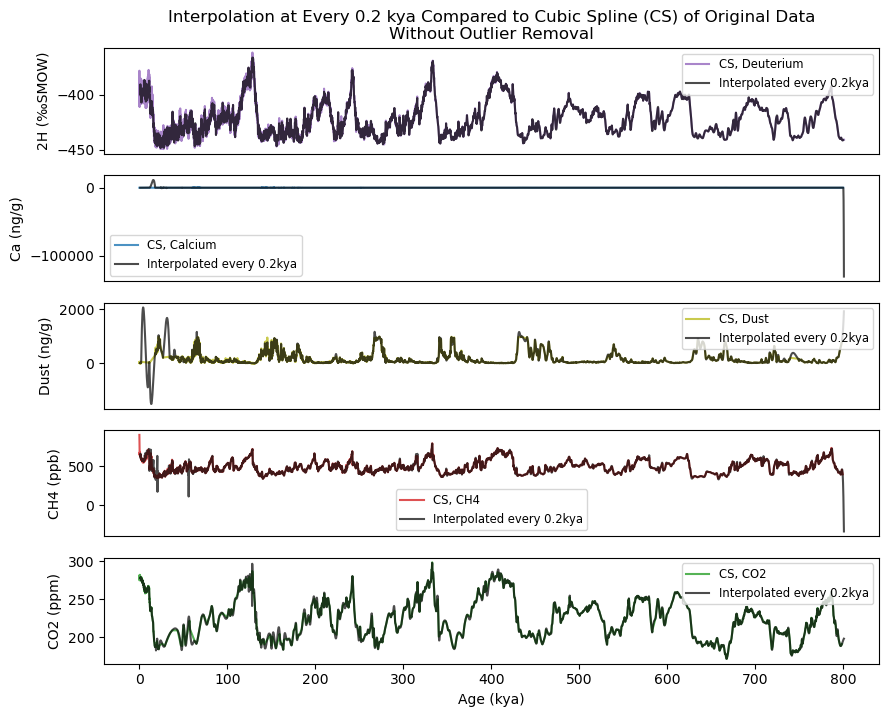

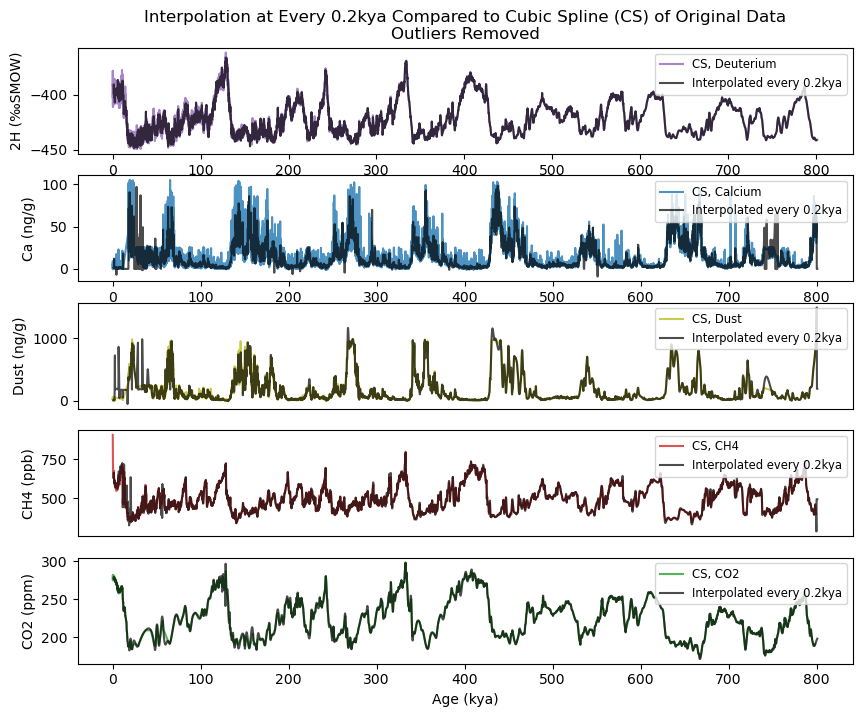

In [45]:
## FOR TIME INTERVAL = 0.2 kya

# time interval = 200 years = 0.2 kya ("thousands of years ago")
time_2 = np.arange(1,801,0.2)

# estimate the data at each time stamp (when time interval = 0.2)
deu_2 = cs_deuterium(time_2)
dust_2 = dustmass_cs_combined(time_2)
ch4_2 = cs_ch4(time_2)
co2_2 = cs_co2(time_2)
ca_2 = ca_cs_combined(time_2)

# construct data matrix
data_2 = np.matrix([deu_2, co2_2, ch4_2, dust_2, ca_2])
NN = np.shape(data_2)
m = NN[0] # number of variables
n = NN[1] # number of time stamps, or enteries per variable/row

print("The original data matrix, X, is", data_2)
print("The number of variables/rows is", m)
print("When the time interval is 0.2 kya, the number of enteries per row is", n)
print("Matrix X has", m, "x", n, "enteries")

# plot each interpolation versus the original cubic spline
fig,ax = plt.subplots(nrows=5,ncols=1,figsize=(10,8))

ax[0].plot(deu_age, cs_deuterium(deu_age), 'tab:purple', alpha=0.8, label='CS, Deuterium')
ax[0].plot(time_2, deu_2, 'k-', alpha=0.7, label='Interpolated every 0.2kya')
ax[0].set_xticks([])
ax[0].set_title('Interpolation at Every 0.2 kya Compared to Cubic Spline (CS) of Original Data' + '\n' + 'Without Outlier Removal')

ax[1].plot(ca_age, cs_ca(ca_age), 'tab:blue', alpha=0.8, label='CS, Calcium')
ax[1].plot(time_2, ca_2, 'k-', alpha=0.7, label='Interpolated every 0.2kya')
ax[1].set_xticks([])

ax[2].plot(dust_age, cs_dust(dust_age), 'tab:olive', alpha=0.8, label='CS, Dust')
ax[2].plot(time_2, dust_2, 'k-', alpha=0.7, label='Interpolated every 0.2kya')
ax[2].set_xticks([])

ax[3].plot(ch4_age, cs_ch4(ch4_age), 'tab:red', alpha=0.8, label='CS, CH4')
ax[3].plot(time_2, ch4_2, 'k-', alpha=0.7, label='Interpolated every 0.2kya')
ax[3].set_xticks([])

ax[4].plot(co2_age, cs_co2(co2_age), 'tab:green', alpha=0.8, label='CS, CO2')
ax[4].plot(time_2, co2_2, 'k-', alpha=0.7, label='Interpolated every 0.2kya')
ax[4].set_xlabel('Age (kya)')

ax[0].legend(fontsize='small')
ax[1].legend(fontsize='small')
ax[2].legend(fontsize='small')
ax[3].legend(fontsize='small')
ax[4].legend(fontsize='small')

ax[0].set_ylabel('2H (‰SMOW)')
ax[1].set_ylabel('Ca (ng/g)')
ax[2].set_ylabel('Dust (ng/g)')
ax[3].set_ylabel('CH4 (ppb)')
ax[4].set_ylabel('CO2 (ppm)')


# because ca, dust, and ch4 doesn't interpolate properly, 
# we manually remove outliers and replace using the mean of the dataset.
# we use 0 for ca because ca_2 has a very big negative outlier that skews the mean

ca_2[ca_2 > 200] = 0
ca_2[ca_2 < -10] = 0
ca_2[:350][ca_2[:350] > 100] = 0
ca_2[3500:3850][ca_2[3500:3850] > 70] = 0
dust_2[dust_2 > 1500] = np.mean(dust_2)
dust_2[:500][dust_2[:500] > 1000] = np.mean(dust_2)
dust_2[dust_2 < (-100)] = np.mean(dust_2)
ch4_2[ch4_2 < 250] = np.mean(ch4_2)

# reconstruct the data matrix
data_2 = np.matrix([deu_2, co2_2, ch4_2, dust_2, ca_2])

# re-plot each interpolation versus the original cubic spline
fig,ax = plt.subplots(nrows=5,ncols=1,figsize=(10,8))

ax[0].plot(deu_age, cs_deuterium(deu_age), 'tab:purple', alpha=0.8, label='CS, Deuterium')
ax[0].plot(time_2, deu_2, 'k-', alpha=0.7, label='Interpolated every 0.2kya')
#ax[0].set_xticks([])
ax[0].set_title('Interpolation at Every 0.2kya Compared to Cubic Spline (CS) of Original Data' + '\n' + 'Outliers Removed')

ax[1].plot(ca_age, cs_ca(ca_age), 'tab:blue', alpha=0.8, label='CS, Calcium')
ax[1].plot(time_2, ca_2, 'k-', alpha=0.7, label='Interpolated every 0.2kya')
#ax[1].set_xticks([])

ax[2].plot(dust_age, cs_dust(dust_age), 'tab:olive', alpha=0.8, label='CS, Dust')
ax[2].plot(time_2, dust_2, 'k-', alpha=0.7, label='Interpolated every 0.2kya')
ax[2].set_xticks([])

ax[3].plot(ch4_age, cs_ch4(ch4_age), 'tab:red', alpha=0.8, label='CS, CH4')
ax[3].plot(time_2, ch4_2, 'k-', alpha=0.7, label='Interpolated every 0.2kya')
ax[3].set_xticks([])

ax[4].plot(co2_age, cs_co2(co2_age), 'tab:green', alpha=0.8, label='CS, CO2')
ax[4].plot(time_2, co2_2, 'k-', alpha=0.7, label='Interpolated every 0.2kya')
ax[4].set_xlabel('Age (kya)')

ax[0].legend(fontsize='small')
ax[1].legend(fontsize='small')
ax[2].legend(fontsize='small')
ax[3].legend(fontsize='small')
ax[4].legend(fontsize='small')

ax[0].set_ylabel('2H (‰SMOW)')
ax[1].set_ylabel('Ca (ng/g)')
ax[2].set_ylabel('Dust (ng/g)')
ax[3].set_ylabel('CH4 (ppb)')
ax[4].set_ylabel('CO2 (ppm)')

In [47]:
# PCA

print('The original data matrix, X, is \n',data_2,'\n')

#print covariance matrix, S
S2 = np.cov(data_2)
print('The covariance matrix, S, is \n',S2,'\n')

#print eigenvalues of S
eigvals2 = np.linalg.eigvals(S2)
print('The eigenvalues of the covariance matrix are \n', eigvals2,'\n')

# creates a matrix of the recentered data, dividing by 1/sqrt(n-1)
recentered_data2 = 1/math.sqrt(n-1)*(data_2-data_2.mean(axis=1).reshape(-1, 1))

print('The recentered data matrix, B, is \n', recentered_data2, '\n')

# we use singular value decomposition to diagonalize the covariance matrix
u2,s2,Pt2 = np.linalg.svd(np.transpose(recentered_data2))
print('Through Singular Value Decomposition, we find the matrix P^t is \n', Pt2,'\n')

P2 = np.transpose(Pt2)

# getting the transformed data
transformed_data2 = Pt2 @ data_2
print('The transformed data, y = P^Tx, is \n', transformed_data2, '\n')

# get the principle components, which are the columns of P
print('The first principle component is \n', P2[:,0], '\n')
print('The second principle component is \n', P2[:,1], '\n')

# getting the covariance matrix of the transformed data
D2 = np.matrix.round(np.diag(eigvals2), decimals=2)
print('The covariance matrix, D, of the transformed data is the diagonal matrix of the eigenvalues, which is \n', D2, '\n')

The original data matrix, X, is 
 [[-398.5913142  -390.26462982 -396.11530611 ... -441.51378918
  -441.39244232 -441.24556376]
 [ 277.60499321  278.24631911  277.98877492 ...  197.31877071
   197.7550894   198.09372336]
 [ 630.1056499   664.80114074  641.07934418 ...  494.76723816
   494.76723816  494.76723816]
 [  10.16827051    9.04952737   12.45093016 ...  190.62794877
   190.62794877  190.62794877]
 [   1.35664054    1.4574219     2.04213118 ...    0.
     0.            0.        ]] 

The covariance matrix, S, is 
 [[   229.97529041    330.84261663   1008.94761484  -2141.9513833
    -159.02534702]
 [   330.84261663    651.04223566   1619.44695341  -3450.92493029
    -265.06637138]
 [  1008.94761484   1619.44695341   6643.0219797  -10260.08491982
    -792.49708086]
 [ -2141.9513833   -3450.92493029 -10260.08491982  52587.41758711
    3041.77991864]
 [  -159.02534702   -265.06637138   -792.49708086   3041.77991864
     257.03970455]] 

The eigenvalues of the covariance matrix are 
 [

In [55]:
# DATA REDUCTION

# truncating by keeping first k components
k = 1

#truncated P matrix that keeps the first k columns
P_trunc2 = P2[:,:k]

# the first k rows of the transformed data
transformed_data_trunc2 = transformed_data2[:k,:]

# approximation for data
approx12 = P_trunc2 @transformed_data_trunc2
print('The rank 1 approxmiation for the data is \n', approx12, '\n')


# EVALUATION

# calculate the correlation matrix between the approximated data versus the originally interpolated data

#deuterium
deu_cor_stacked1 = np.vstack([approx12[0],
           deu_2])
deu_cor1 = np.corrcoef(deu_cor_stacked1)
print('Using Rank 1 Approximation, the correlation coefficient for the approximated and original deuterium data is \n', deu_cor1[0,1], '\n')
print('The correlation matrix is \n', deu_cor1, '\n')

#co2
co2_cor_stacked1 = np.vstack([approx12[1],
           co2_2])
co2_cor1 = np.corrcoef(co2_cor_stacked1)
print('Using Rank 1 Approximation, the correlation coefficient for the approximated and original CO2 data is \n', co2_cor1[0,1], '\n')
print('The correlation matrix is \n', co2_cor1, '\n')

#ch4
ch4_cor_stacked1 = np.vstack([approx12[2],
           ch4_2])
ch4_cor1 = np.corrcoef(ch4_cor_stacked1)

print('Using Rank 1 Approximation, the correlation coefficient for the approximated and original CH4 data is \n', ch4_cor1[0,1], '\n')
print('The correlation matrix is \n', ch4_cor1, '\n')

#dust
dust_cor_stacked1 = np.vstack([approx12[3],
           dust_2])
dust_cor1 = np.corrcoef(dust_cor_stacked1)

print('Using Rank 1 Approximation, the correlation coefficient for the approximated and original Dust data is \n', dust_cor1[0,1], '\n')
print('The correlation matrix is \n', dust_cor1, '\n')

#calcium
ca_cor_stacked1 = np.vstack([approx12[4],
           ca_2])
ca_cor1 = np.corrcoef(ca_cor_stacked1)
print('Using Rank 1 Approximation, the correlation coefficient for the approximated and original Calcium data is \n', ca_cor1[0,1], '\n')
print('The correlation matrix is \n', ca_cor1, '\n')




# truncating by keeping first k components
k = 2

#truncated P matrix that keeps the first k columns
P_trunc2 = P2[:,:k]

# the first k rows of the transformed data
transformed_data_trunc2 = transformed_data2[:k,:]

# approximation for data
approx22 = P_trunc2 @transformed_data_trunc2
print('The rank 2 approxmiation for the data is \n', approx22, '\n')


# EVALUATION

# calculate the correlation matrix between the approximated data versus the originally interpolated data

#deuterium
deu_cor_stacked2 = np.vstack([approx22[0],
           deu_2])
deu_cor2 = np.corrcoef(deu_cor_stacked2)
print('Using Rank 2 Approximation, the correlation coefficient for the approximated and original deuterium data is \n', deu_cor2[0,1], '\n')
print('The correlation matrix is \n', deu_cor2, '\n')

#co2
co2_cor_stacked2 = np.vstack([approx22[1],
           co2_2])
co2_cor2 = np.corrcoef(co2_cor_stacked2)
print('Using Rank 2 Approximation, the correlation coefficient for the approximated and original CO2 data is \n', co2_cor2[0,1], '\n')
print('The correlation matrix is \n', co2_cor2, '\n')

#ch4
ch4_cor_stacked2 = np.vstack([approx22[2],
           ch4_2])
ch4_cor2 = np.corrcoef(ch4_cor_stacked2)

print('Using Rank 2 Approximation, the correlation coefficient for the approximated and original CH4 data is \n', ch4_cor2[0,1], '\n')
print('The correlation matrix is \n', ch4_cor2, '\n')

#dust
dust_cor_stacked2 = np.vstack([approx22[3],
           dust_2])
dust_cor2 = np.corrcoef(dust_cor_stacked2)

print('Using Rank 2 Approximation, the correlation coefficient for the approximated and original Dust data is \n', dust_cor2[0,1], '\n')
print('The correlation matrix is \n', dust_cor2, '\n')

#calcium
ca_cor_stacked2 = np.vstack([approx22[4],
           ca_2])
ca_cor2 = np.corrcoef(ca_cor_stacked2)
print('Using Rank 2 Approximation, the correlation coefficient for the approximated and original Calcium data is \n', ca_cor2[0,1], '\n')
print('The correlation matrix is \n', ca_cor2, '\n')

The rank 1 approxmiation for the data is 
 [[   5.23512003    5.60416535    5.24214871 ...   -3.68188504
    -3.68041223   -3.67917512]
 [   8.44692236    9.04238094    8.45826321 ...   -5.94076102
    -5.93838464   -5.93638855]
 [  25.92552514   27.7531229    25.96033279 ...  -18.23354622
   -18.22625255  -18.2201261 ]
 [-120.57058653 -129.0701071  -120.73246478 ...   84.79787199
    84.76395166   84.73545972]
 [  -7.09110218   -7.59098337   -7.1006227  ...    4.98720618
     4.98521123    4.98353554]] 

Using Rank 1 Approximation, the correlation coefficient for the approximated and original deuterium data is 
 0.6550938202606696 

The correlation matrix is 
 [[1.         0.65509382]
 [0.65509382 1.        ]] 

Using Rank 1 Approximation, the correlation coefficient for the approximated and original CO2 data is 
 0.6282194337773608 

The correlation matrix is 
 [[1.         0.62821943]
 [0.62821943 1.        ]] 

Using Rank 1 Approximation, the correlation coefficient for the approxi

# 5. Visualization of PCA Outcome

## Use 1kya time interval

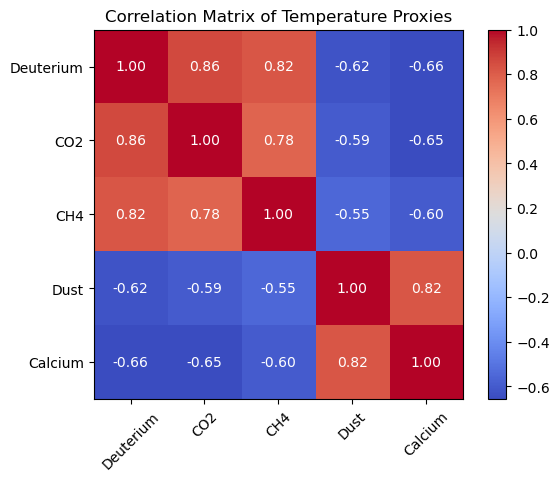

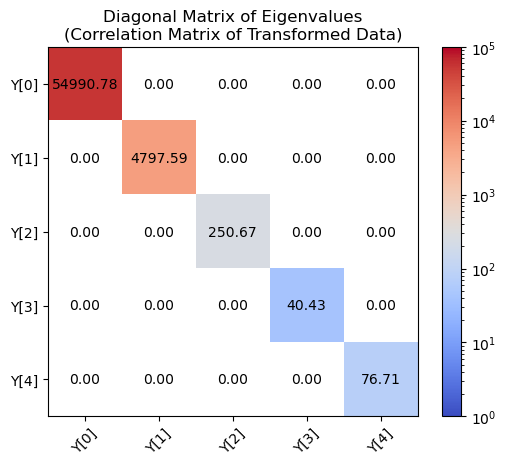

In [52]:
# plot correlation matrix for the original data
Cor_matrix = np.corrcoef(data)
plt.imshow(Cor_matrix)
plt.colorbar()
plt.set_cmap('coolwarm')
plt.title('Correlation Matrix of Temperature Proxies')

for i in range(5):
    for j in range(5):
        plt.text(j, i, f'{Cor_matrix[i, j]:.2f}', 
                 ha='center', va='center', color='white')
plt.xticks(range(5), ['Deuterium', 'CO2', 'CH4', 'Dust', 'Calcium'], rotation=45)
plt.yticks(range(5), ['Deuterium', 'CO2', 'CH4', 'Dust', 'Calcium'])

plt.show()


# plot the correlation matrix of the transformed data, 
# which is the diagonal matrix of eigenvalues
from matplotlib.colors import LogNorm

plt.imshow(D, cmap='coolwarm', norm=LogNorm(vmin=1e0, vmax=1e5))
plt.colorbar()
plt.title('Diagonal Matrix of Eigenvalues' + "\n"  + 
          '(Correlation Matrix of Transformed Data)')

for i in range(5):
    for j in range(5):
        plt.text(j, i, f'{D[i, j]:.2f}', 
                 ha='center', va='center', color='black')
plt.xticks(range(5), ['Y[0]', 'Y[1]', 'Y[2]', 'Y[3]', 'Y[4]'], rotation=45)
plt.yticks(range(5), ['Y[0]', 'Y[1]', 'Y[2]', 'Y[3]', 'Y[4]'])

plt.show()

Text(0, 0.5, 'Ca (ng/g)')

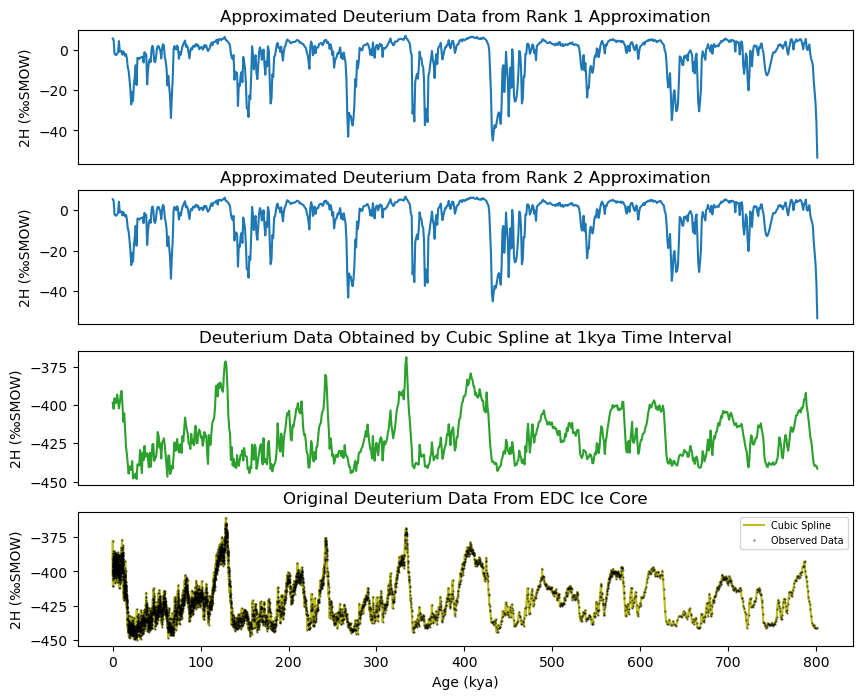

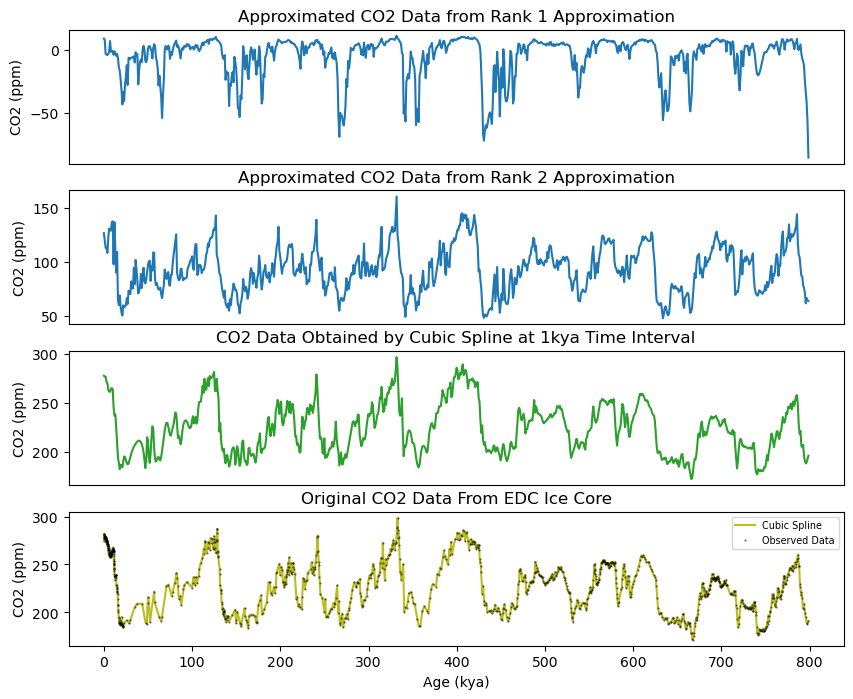

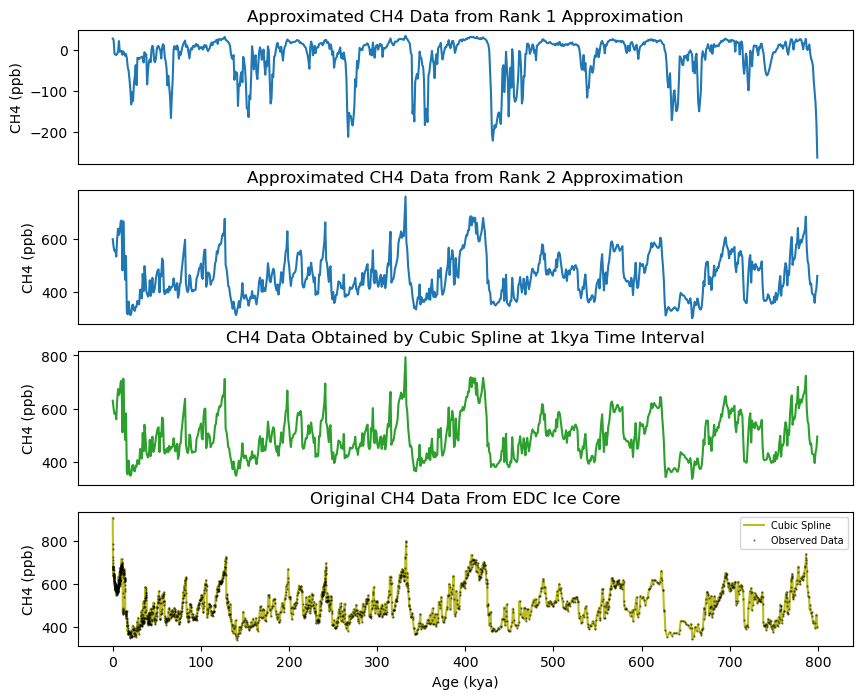

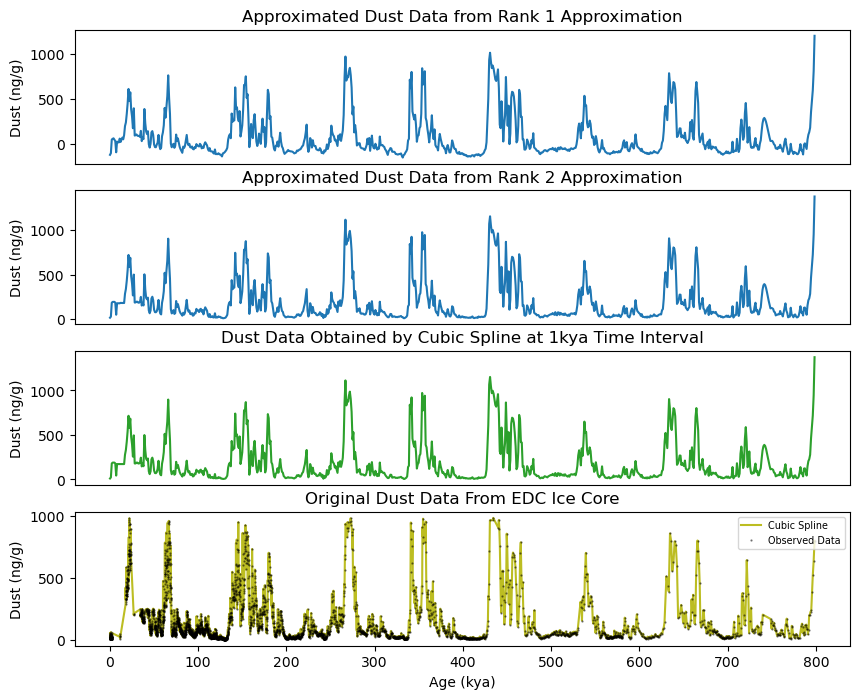

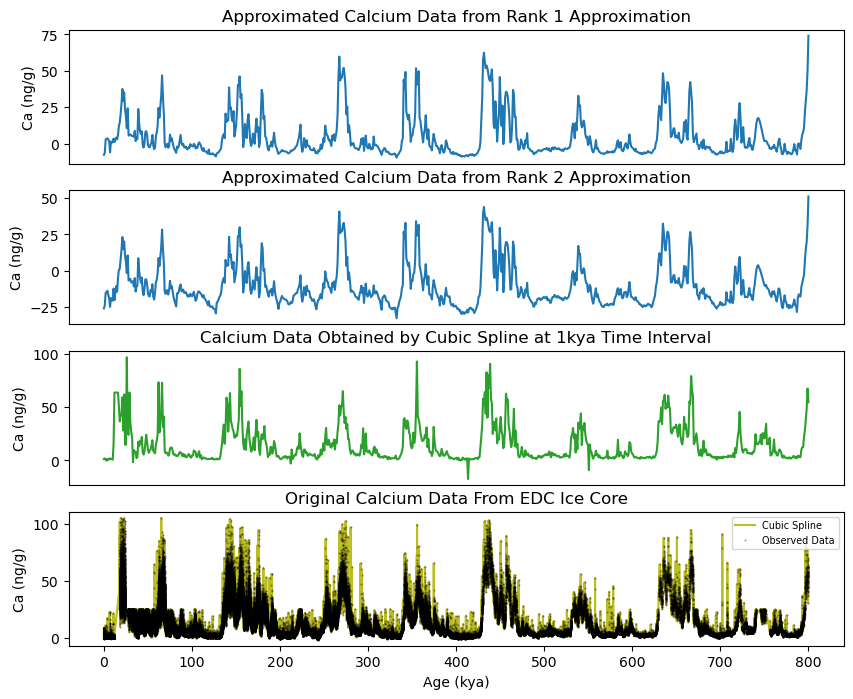

In [53]:
# make the first row of the approximated data matrices an array for plotting

deu_t1 = np.transpose(approx1[0])
deu_approx1 = np.array(deu_t1)

deu_t2 = np.transpose(approx2[0])
deu_approx2 = np.array(deu_t2)

# plot deuterium

fig,ax = plt.subplots(nrows=4, ncols=1, figsize=(10,8))
ax[0].plot(time_1, deu_approx1, 'tab:blue')
ax[0].set_title('Approximated Deuterium Data from Rank 1 Approximation')
ax[0].set_xticks([])

ax[1].plot(time_1, deu_approx1, 'tab:blue')
ax[1].set_title('Approximated Deuterium Data from Rank 2 Approximation')
ax[1].set_xticks([])

ax[2].plot(time_1, deu_1, 'tab:green')
ax[2].set_xticks([])
ax[2].set_title('Deuterium Data Obtained by Cubic Spline at 1kya Time Interval')

ax[3].plot(deu_age,cs_deuterium(deu_age),'tab:olive', label = 'Cubic Spline')
ax[3].plot(deu_age,deu_dobs, 'ko', markersize=0.6, alpha=0.5, label = 'Observed Data')
ax[3].set_xlabel('Age (kya)')
ax[3].legend(fontsize='x-small')
ax[3].set_title('Original Deuterium Data From EDC Ice Core')

ax[0].set_ylabel('2H (‰SMOW)')
ax[1].set_ylabel('2H (‰SMOW)')
ax[2].set_ylabel('2H (‰SMOW)')
ax[3].set_ylabel('2H (‰SMOW)')

# make the second row of the approximated data matrices an array for plotting

co2_t1 = np.transpose(approx1[1])
co2_approx1 = np.array(co2_t1)

co2_t2 = np.transpose(approx2[1])
co2_approx2 = np.array(co2_t2)

# plot CO2

fig,ax = plt.subplots(nrows=4, ncols=1, figsize=(10,8))
ax[0].plot(time_1, co2_approx1, 'tab:blue')
ax[0].set_title('Approximated CO2 Data from Rank 1 Approximation')
ax[0].set_xticks([])

ax[1].plot(time_1, co2_approx2, 'tab:blue')
ax[1].set_title('Approximated CO2 Data from Rank 2 Approximation')
ax[1].set_xticks([])

ax[2].plot(time_1, co2_1, 'tab:green')
ax[2].set_xticks([])
ax[2].set_title('CO2 Data Obtained by Cubic Spline at 1kya Time Interval')

ax[3].plot(co2_age,cs_co2(co2_age),'tab:olive', label = 'Cubic Spline')
ax[3].plot(co2_age,co2_dobs,'ko', markersize=0.6, alpha=0.5, label = 'Observed Data')
ax[3].set_xlabel('Age (kya)')
ax[3].legend(fontsize='x-small')
ax[3].set_title('Original CO2 Data From EDC Ice Core')

ax[0].set_ylabel('CO2 (ppm)')
ax[1].set_ylabel('CO2 (ppm)')
ax[2].set_ylabel('CO2 (ppm)')
ax[3].set_ylabel('CO2 (ppm)')


# plot CH4

ch4_approx1 = np.array(np.transpose(approx1[2]))
ch4_approx2 = np.array(np.transpose(approx2[2]))

fig,ax = plt.subplots(nrows=4, ncols=1, figsize=(10,8))
ax[0].plot(time_1, ch4_approx1, 'tab:blue')
ax[0].set_title('Approximated CH4 Data from Rank 1 Approximation')
ax[0].set_xticks([])

ax[1].plot(time_1, ch4_approx2, 'tab:blue')
ax[1].set_title('Approximated CH4 Data from Rank 2 Approximation')
ax[1].set_xticks([])

ax[2].plot(time_1, ch4_1, 'tab:green')
ax[2].set_xticks([])
ax[2].set_title('CH4 Data Obtained by Cubic Spline at 1kya Time Interval')

ax[3].plot(ch4_age,cs_ch4(ch4_age),'tab:olive', label = 'Cubic Spline')
ax[3].plot(ch4_age,ch4_dobs,'ko', markersize=0.6, alpha=0.5, label = 'Observed Data')
ax[3].set_xlabel('Age (kya)')
ax[3].legend(fontsize='x-small')
ax[3].set_title('Original CH4 Data From EDC Ice Core')

ax[0].set_ylabel('CH4 (ppb)')
ax[1].set_ylabel('CH4 (ppb)')
ax[2].set_ylabel('CH4 (ppb)')
ax[3].set_ylabel('CH4 (ppb)')

# plot Dust

dust_approx1 = np.array(np.transpose(approx1[3]))
dust_approx2 = np.array(np.transpose(approx2[3]))

fig,ax = plt.subplots(nrows=4, ncols=1, figsize=(10,8))
ax[0].plot(time_1, dust_approx1, 'tab:blue')
ax[0].set_title('Approximated Dust Data from Rank 1 Approximation')
ax[0].set_xticks([])

ax[1].plot(time_1, dust_approx2, 'tab:blue')
ax[1].set_title('Approximated Dust Data from Rank 2 Approximation')
ax[1].set_xticks([])

ax[2].plot(time_1, dust_1, 'tab:green')
ax[2].set_xticks([])
ax[2].set_title('Dust Data Obtained by Cubic Spline at 1kya Time Interval')

ax[3].plot(dust_age,cs_dust(dust_age),'tab:olive', label = 'Cubic Spline')
ax[3].plot(dust_age,dust_dobs,'ko', markersize=0.6, alpha=0.5, label = 'Observed Data')
ax[3].set_xlabel('Age (kya)')
ax[3].legend(fontsize='x-small')
ax[3].set_title('Original Dust Data From EDC Ice Core')

ax[0].set_ylabel('Dust (ng/g)')
ax[1].set_ylabel('Dust (ng/g)')
ax[2].set_ylabel('Dust (ng/g)')
ax[3].set_ylabel('Dust (ng/g)')

# plot Calcium

ca_approx1 = np.array(np.transpose(approx1[4]))
ca_approx2 = np.array(np.transpose(approx2[4]))

fig,ax = plt.subplots(nrows=4, ncols=1, figsize=(10,8))
ax[0].plot(time_1, ca_approx1, 'tab:blue')
ax[0].set_title('Approximated Calcium Data from Rank 1 Approximation')
ax[0].set_xticks([])

ax[1].plot(time_1, ca_approx2, 'tab:blue')
ax[1].set_title('Approximated Calcium Data from Rank 2 Approximation')
ax[1].set_xticks([])

ax[2].plot(time_1, ca_1, 'tab:green')
ax[2].set_xticks([])
ax[2].set_title('Calcium Data Obtained by Cubic Spline at 1kya Time Interval')

ax[3].plot(ca_age,cs_ca(ca_age),'tab:olive', label = 'Cubic Spline')
ax[3].plot(ca_age,ca_dobs,'ko', markersize=0.6, alpha=0.3, label = 'Observed Data')
ax[3].set_xlabel('Age (kya)')
ax[3].legend(fontsize='x-small')
ax[3].set_title('Original Calcium Data From EDC Ice Core')

ax[0].set_ylabel('Ca (ng/g)')
ax[1].set_ylabel('Ca (ng/g)')
ax[2].set_ylabel('Ca (ng/g)')
ax[3].set_ylabel('Ca (ng/g)')

### Use 0.2kya time interval

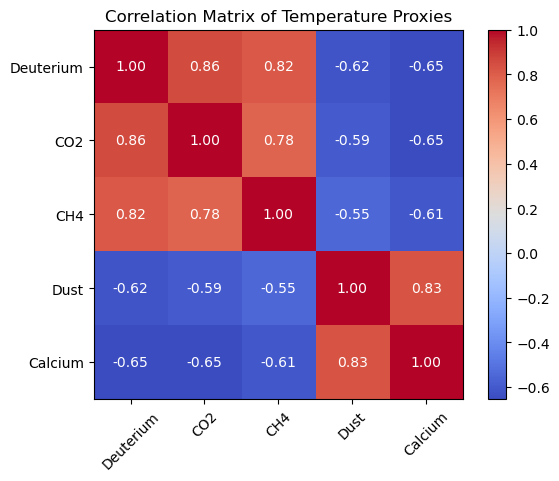

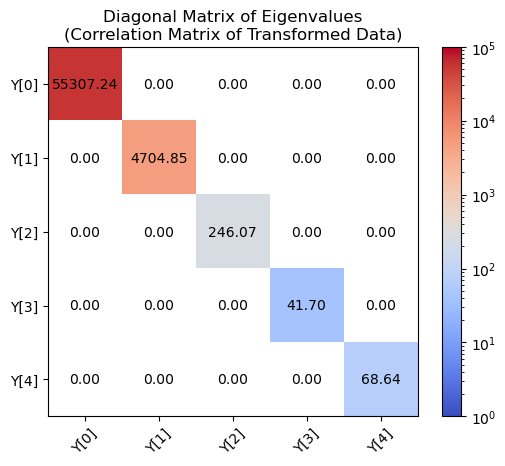

In [48]:
# plot correlation matrix for the original data
Cor_matrix2 = np.corrcoef(data_2)
plt.imshow(Cor_matrix2)
plt.colorbar()
plt.set_cmap('coolwarm')
plt.title('Correlation Matrix of Temperature Proxies')

for i in range(5):
    for j in range(5):
        plt.text(j, i, f'{Cor_matrix2[i, j]:.2f}', 
                 ha='center', va='center', color='white')
plt.xticks(range(5), ['Deuterium', 'CO2', 'CH4', 'Dust', 'Calcium'], rotation=45)
plt.yticks(range(5), ['Deuterium', 'CO2', 'CH4', 'Dust', 'Calcium'])

plt.show()


# plot the correlation matrix of the transformed data, which is the diagonal matrix of eigenvalues
from matplotlib.colors import LogNorm

plt.imshow(D2, cmap='coolwarm', norm=LogNorm(vmin=1e0, vmax=1e5))
plt.colorbar()
plt.title('Diagonal Matrix of Eigenvalues' + "\n"  + '(Correlation Matrix of Transformed Data)')

for i in range(5):
    for j in range(5):
        plt.text(j, i, f'{D2[i, j]:.2f}', 
                 ha='center', va='center', color='black')
plt.xticks(range(5), ['Y[0]', 'Y[1]', 'Y[2]', 'Y[3]', 'Y[4]'], rotation=45)
plt.yticks(range(5), ['Y[0]', 'Y[1]', 'Y[2]', 'Y[3]', 'Y[4]'])

plt.show()

Text(0, 0.5, 'Ca (ng/g)')

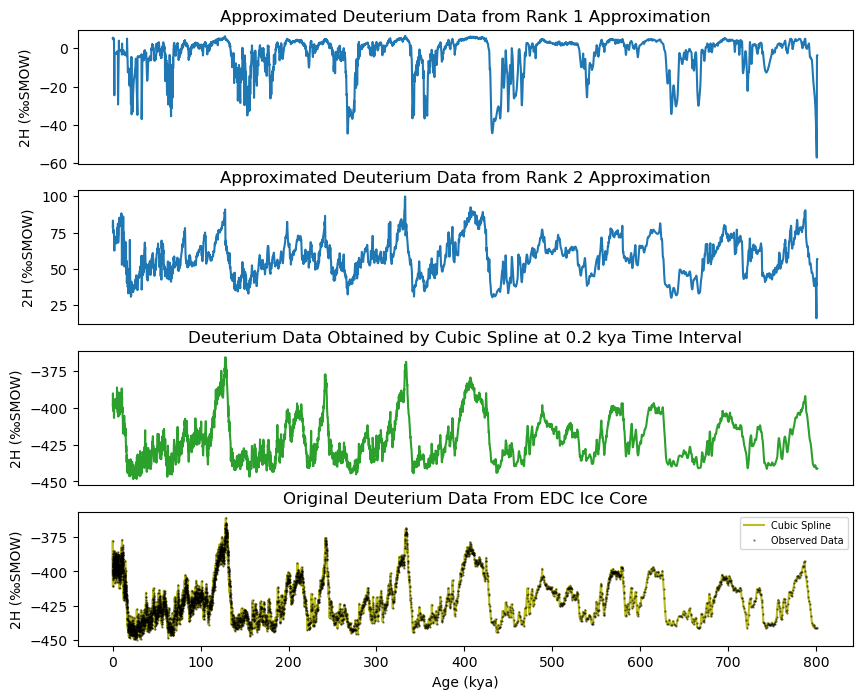

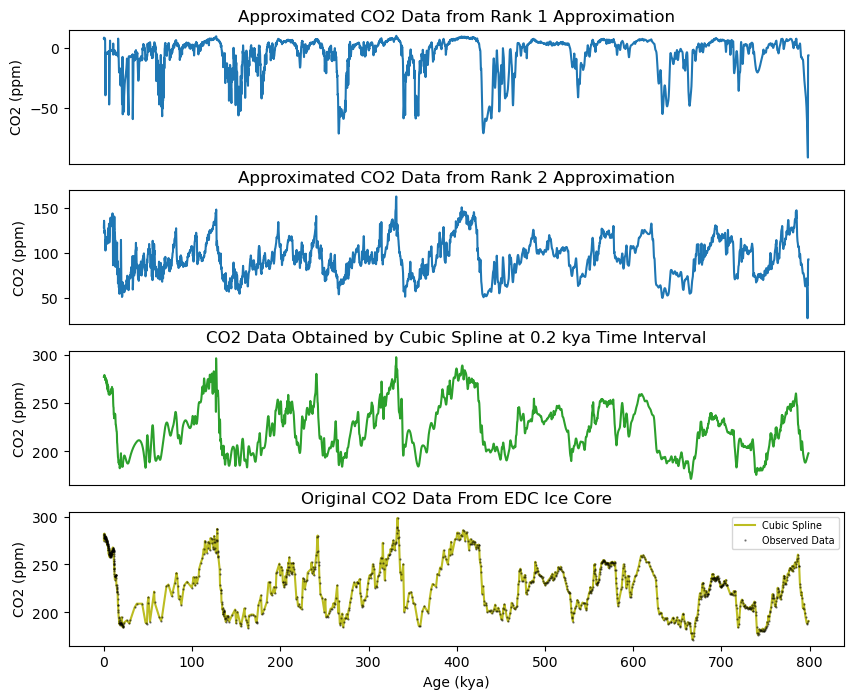

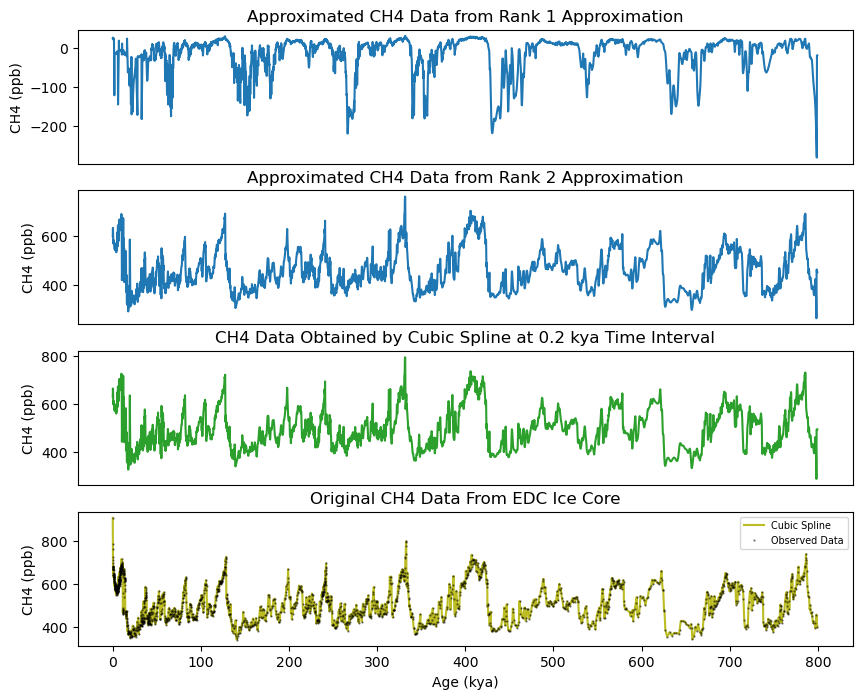

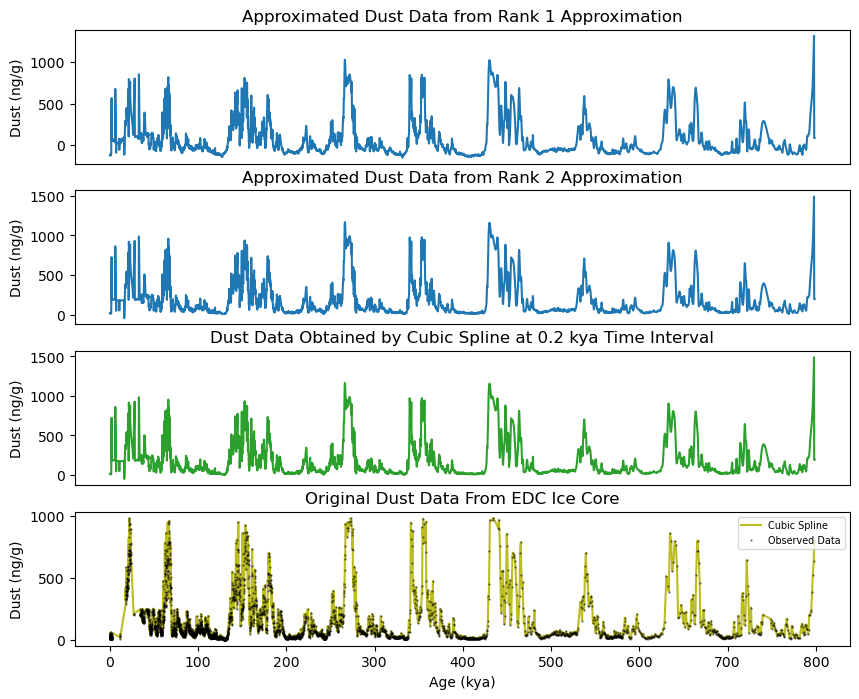

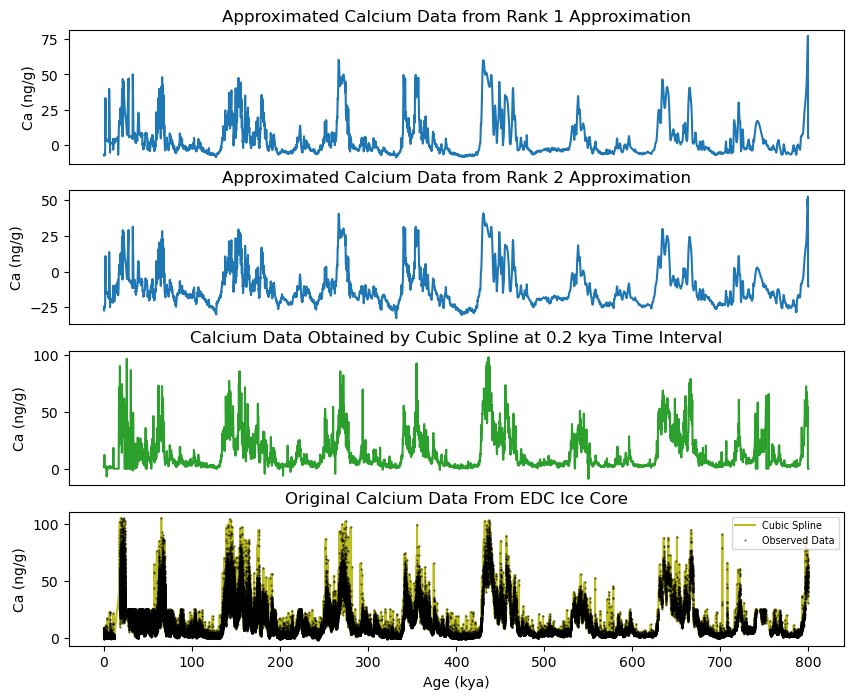

In [54]:
# plot deuterium

deu_approx12 = np.array(np.transpose(approx12[0]))
deu_approx22 = np.array(np.transpose(approx22[0]))

fig,ax = plt.subplots(nrows=4, ncols=1, figsize=(10,8))
ax[0].plot(time_2, deu_approx12, 'tab:blue')
ax[0].set_title('Approximated Deuterium Data from Rank 1 Approximation')
ax[0].set_xticks([])

ax[1].plot(time_2, deu_approx22, 'tab:blue')
ax[1].set_title('Approximated Deuterium Data from Rank 2 Approximation')
ax[1].set_xticks([])

ax[2].plot(time_2, deu_2, 'tab:green')
ax[2].set_xticks([])
ax[2].set_title('Deuterium Data Obtained by Cubic Spline at 0.2 kya Time Interval')

ax[3].plot(deu_age,cs_deuterium(deu_age),'tab:olive', label = 'Cubic Spline')
ax[3].plot(deu_age,deu_dobs, 'ko', markersize=0.6, alpha=0.5, label = 'Observed Data')
ax[3].set_xlabel('Age (kya)')
ax[3].legend(fontsize='x-small')
ax[3].set_title('Original Deuterium Data From EDC Ice Core')

ax[0].set_ylabel('2H (‰SMOW)')
ax[1].set_ylabel('2H (‰SMOW)')
ax[2].set_ylabel('2H (‰SMOW)')
ax[3].set_ylabel('2H (‰SMOW)')



# plot CO2

co2_approx12 = np.array(np.transpose(approx12[1]))
co2_approx22 = np.array(np.transpose(approx22[1]))

fig,ax = plt.subplots(nrows=4, ncols=1, figsize=(10,8))
ax[0].plot(time_2, co2_approx12, 'tab:blue')
ax[0].set_title('Approximated CO2 Data from Rank 1 Approximation')
ax[0].set_xticks([])

ax[1].plot(time_2, co2_approx22, 'tab:blue')
ax[1].set_title('Approximated CO2 Data from Rank 2 Approximation')
ax[1].set_xticks([])

ax[2].plot(time_2, co2_2, 'tab:green')
ax[2].set_xticks([])
ax[2].set_title('CO2 Data Obtained by Cubic Spline at 0.2 kya Time Interval')

ax[3].plot(co2_age,cs_co2(co2_age),'tab:olive', label = 'Cubic Spline')
ax[3].plot(co2_age,co2_dobs,'ko', markersize=0.6, alpha=0.5, label = 'Observed Data')
ax[3].set_xlabel('Age (kya)')
ax[3].legend(fontsize='x-small')
ax[3].set_title('Original CO2 Data From EDC Ice Core')

ax[0].set_ylabel('CO2 (ppm)')
ax[1].set_ylabel('CO2 (ppm)')
ax[2].set_ylabel('CO2 (ppm)')
ax[3].set_ylabel('CO2 (ppm)')



# plot CH4

ch4_approx12 = np.array(np.transpose(approx12[2]))
ch4_approx22 = np.array(np.transpose(approx22[2]))

fig,ax = plt.subplots(nrows=4, ncols=1, figsize=(10,8))
ax[0].plot(time_2, ch4_approx12, 'tab:blue')
ax[0].set_title('Approximated CH4 Data from Rank 1 Approximation')
ax[0].set_xticks([])

ax[1].plot(time_2, ch4_approx22, 'tab:blue')
ax[1].set_title('Approximated CH4 Data from Rank 2 Approximation')
ax[1].set_xticks([])

ax[2].plot(time_2, ch4_2, 'tab:green')
ax[2].set_xticks([])
ax[2].set_title('CH4 Data Obtained by Cubic Spline at 0.2 kya Time Interval')

ax[3].plot(ch4_age,cs_ch4(ch4_age),'tab:olive', label = 'Cubic Spline')
ax[3].plot(ch4_age,ch4_dobs,'ko', markersize=0.6, alpha=0.5, label = 'Observed Data')
ax[3].set_xlabel('Age (kya)')
ax[3].legend(fontsize='x-small')
ax[3].set_title('Original CH4 Data From EDC Ice Core')

ax[0].set_ylabel('CH4 (ppb)')
ax[1].set_ylabel('CH4 (ppb)')
ax[2].set_ylabel('CH4 (ppb)')
ax[3].set_ylabel('CH4 (ppb)')



# plot Dust

dust_approx12 = np.array(np.transpose(approx12[3]))
dust_approx22 = np.array(np.transpose(approx22[3]))

fig,ax = plt.subplots(nrows=4, ncols=1, figsize=(10,8))
ax[0].plot(time_2, dust_approx12, 'tab:blue')
ax[0].set_title('Approximated Dust Data from Rank 1 Approximation')
ax[0].set_xticks([])

ax[1].plot(time_2, dust_approx22, 'tab:blue')
ax[1].set_title('Approximated Dust Data from Rank 2 Approximation')
ax[1].set_xticks([])

ax[2].plot(time_2, dust_2, 'tab:green')
ax[2].set_xticks([])
ax[2].set_title('Dust Data Obtained by Cubic Spline at 0.2 kya Time Interval')

ax[3].plot(dust_age,cs_dust(dust_age),'tab:olive', label = 'Cubic Spline')
ax[3].plot(dust_age,dust_dobs,'ko', markersize=0.6, alpha=0.5, label = 'Observed Data')
ax[3].set_xlabel('Age (kya)')
ax[3].legend(fontsize='x-small')
ax[3].set_title('Original Dust Data From EDC Ice Core')

ax[0].set_ylabel('Dust (ng/g)')
ax[1].set_ylabel('Dust (ng/g)')
ax[2].set_ylabel('Dust (ng/g)')
ax[3].set_ylabel('Dust (ng/g)')



# plot Calcium

ca_approx12 = np.array(np.transpose(approx12[4]))
ca_approx22 = np.array(np.transpose(approx22[4]))

fig,ax = plt.subplots(nrows=4, ncols=1, figsize=(10,8))
ax[0].plot(time_2, ca_approx12, 'tab:blue')
ax[0].set_title('Approximated Calcium Data from Rank 1 Approximation')
ax[0].set_xticks([])

ax[1].plot(time_2, ca_approx22, 'tab:blue')
ax[1].set_title('Approximated Calcium Data from Rank 2 Approximation')
ax[1].set_xticks([])

ax[2].plot(time_2, ca_2, 'tab:green')
ax[2].set_xticks([])
ax[2].set_title('Calcium Data Obtained by Cubic Spline at 0.2 kya Time Interval')

ax[3].plot(ca_age,cs_ca(ca_age),'tab:olive', label = 'Cubic Spline')
ax[3].plot(ca_age,ca_dobs,'ko', markersize=0.6, alpha=0.5, label = 'Observed Data')
ax[3].set_xlabel('Age (kya)')
ax[3].legend(fontsize='x-small')
ax[3].set_title('Original Calcium Data From EDC Ice Core')

ax[0].set_ylabel('Ca (ng/g)')
ax[1].set_ylabel('Ca (ng/g)')
ax[2].set_ylabel('Ca (ng/g)')
ax[3].set_ylabel('Ca (ng/g)')

## Conclusion of analysis

# 6. Works Cited